# Machine Learning Pipeline Predicting the estimated time of arrival for orders- from pick-up to drop-off.

## Project Name: Sendy Logistics Challenge by EXPLORE Data Science Academy

We will be going through the whole EDA process to build a model that predicts the estimated time of arrvial of orders from
pick-up to drop-off

##  All the Lifecycle In A Data Science Projects
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

## Import Libraries for Pipeline

In [1587]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import statsmodels.api as sm
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
sns.set(palette = 'Set2')
pd.pandas.set_option('display.max_columns',None) ## display all columns in full

## Data Analysis. 
Understand more about the data

#### In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(Time from pickup to arrival)


## Import Data

In [1588]:
df_train = pd.read_csv('Train.csv') ## data we will train model on
df_test = pd.read_csv('Test.csv') ## data we will test model on
df_rider = pd.read_csv('Riders.csv') ## data containing delivery drivers information

In [1589]:
df_train.shape ## check the shape, we can see that theres 29 columns and 21201 rows

(21201, 29)

In [1590]:
df_train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.40,nan,-1.32,36.83,-1.30,36.83,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.40,nan,-1.35,36.90,-1.30,36.81,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,nan,nan,-1.31,36.84,-1.30,36.83,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.20,nan,-1.28,36.83,-1.26,36.80,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.40,nan,-1.27,36.79,-1.30,36.81,Rider_Id_770,1214


In [1591]:
## Rider ID has information we can use so lets combine it with our df_train
df_train = df_train.merge(df_rider, how='left', left_on = 'Rider Id', right_on = 'Rider Id')

In [1592]:
df_train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.40,nan,-1.32,36.83,-1.30,36.83,Rider_Id_432,745,1637,1309,13.80,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.40,nan,-1.35,36.90,-1.30,36.81,Rider_Id_856,1993,396,339,13.60,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,nan,nan,-1.31,36.84,-1.30,36.83,Rider_Id_155,455,1023,242,12.50,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.20,nan,-1.28,36.83,-1.26,36.80,Rider_Id_855,1341,886,283,14.50,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.40,nan,-1.27,36.79,-1.30,36.81,Rider_Id_770,1214,2311,872,14.10,533


In [1593]:
df_clean = df_train.copy()

## Cleaning Data for Analysis

In [1594]:
## lets clean up the column names to have the same naming convention
df_clean.columns = [i.replace(' ', '_') for i in df_clean.columns]
df_clean.columns = [i.replace('-', '') for i in df_clean.columns]
df_clean.columns = [i.replace('__', '_') for i in df_clean.columns]
df_clean.columns

Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement_Day_of_Month',
       'Placement_Weekday_(Mo_=_1)', 'Placement_Time',
       'Confirmation_Day_of_Month', 'Confirmation_Weekday_(Mo_=_1)',
       'Confirmation_Time', 'Arrival_at_Pickup_Day_of_Month',
       'Arrival_at_Pickup_Weekday_(Mo_=_1)', 'Arrival_at_Pickup_Time',
       'Pickup_Day_of_Month', 'Pickup_Weekday_(Mo_=_1)', 'Pickup_Time',
       'Arrival_at_Destination_Day_of_Month',
       'Arrival_at_Destination_Weekday_(Mo_=_1)',
       'Arrival_at_Destination_Time', 'Distance_(KM)', 'Temperature',
       'Precipitation_in_millimeters', 'Pickup_Lat', 'Pickup_Long',
       'Destination_Lat', 'Destination_Long', 'Rider_Id',
       'Time_from_Pickup_to_Arrival', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings'],
      dtype='object')

In [1595]:
## convert time objects to datetime objects
df_clean['Placement_Time'] = pd.to_datetime(df_clean['Placement_Time'])
df_clean['Confirmation_Time'] = pd.to_datetime(df_clean['Confirmation_Time'])
df_clean['Arrival_at_Pickup_Time'] = pd.to_datetime(df_clean['Arrival_at_Pickup_Time'])
df_clean['Pickup_Time'] = pd.to_datetime(df_clean['Pickup_Time'])

In [1596]:
### change time variables to difference in time in seconds to keep time stationary and appropriate for our model
df_clean['Time_Placement_to_Confirmation'] = (df_clean['Confirmation_Time'] - df_clean['Placement_Time']).dt.seconds
df_clean['Time_Confirmation_to_PickupArrival'] = (df_clean['Arrival_at_Pickup_Time'] - df_clean['Confirmation_Time']).dt.seconds
df_clean['Time_Arrival_to_Pickup'] = (df_clean['Pickup_Time'] - df_clean['Arrival_at_Pickup_Time']).dt.seconds

In [1597]:
### drop the old columns. Note we will keep one for analysis purposes 'Placement_Time'
df_clean.drop(['Confirmation_Time', 'Arrival_at_Pickup_Time', "Pickup_Time"], axis= 1, inplace=True)

In [1598]:
## check our previous assumption that all day of month and day of week values are the same
df_clean[df_clean['Placement_Day_of_Month'] != df_clean['Confirmation_Day_of_Month']]

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_Day_of_Month,Placement_Weekday_(Mo_=_1),Placement_Time,Confirmation_Day_of_Month,Confirmation_Weekday_(Mo_=_1),Arrival_at_Pickup_Day_of_Month,Arrival_at_Pickup_Weekday_(Mo_=_1),Pickup_Day_of_Month,Pickup_Weekday_(Mo_=_1),Arrival_at_Destination_Day_of_Month,Arrival_at_Destination_Weekday_(Mo_=_1),Arrival_at_Destination_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time_Placement_to_Confirmation,Time_Confirmation_to_PickupArrival,Time_Arrival_to_Pickup
4024,Order_No_2800,User_Id_1402,Bike,3,Business,17,1,2020-05-28 14:34:37,18,2,18,2,18,2,18,2,2:45:52 PM,11,25.60,nan,-1.23,36.81,-1.28,36.83,Rider_Id_928,2640,1242,623,14.00,106,81736,2572,127
9804,Order_No_3530,User_Id_2457,Bike,3,Business,11,2,2020-05-28 12:22:05,13,4,13,4,13,4,13,4,2:24:41 PM,8,22.50,nan,-1.29,36.83,-1.26,36.78,Rider_Id_247,1854,2481,752,14.30,322,3925,308,1269


In [1599]:
df_clean[df_clean['Placement_Weekday_(Mo_=_1)'] != df_clean['Confirmation_Weekday_(Mo_=_1)']]

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_Day_of_Month,Placement_Weekday_(Mo_=_1),Placement_Time,Confirmation_Day_of_Month,Confirmation_Weekday_(Mo_=_1),Arrival_at_Pickup_Day_of_Month,Arrival_at_Pickup_Weekday_(Mo_=_1),Pickup_Day_of_Month,Pickup_Weekday_(Mo_=_1),Arrival_at_Destination_Day_of_Month,Arrival_at_Destination_Weekday_(Mo_=_1),Arrival_at_Destination_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time_Placement_to_Confirmation,Time_Confirmation_to_PickupArrival,Time_Arrival_to_Pickup
4024,Order_No_2800,User_Id_1402,Bike,3,Business,17,1,2020-05-28 14:34:37,18,2,18,2,18,2,18,2,2:45:52 PM,11,25.60,nan,-1.23,36.81,-1.28,36.83,Rider_Id_928,2640,1242,623,14.00,106,81736,2572,127
9804,Order_No_3530,User_Id_2457,Bike,3,Business,11,2,2020-05-28 12:22:05,13,4,13,4,13,4,13,4,2:24:41 PM,8,22.50,nan,-1.29,36.83,-1.26,36.78,Rider_Id_247,1854,2481,752,14.30,322,3925,308,1269


In [1600]:
## drop values that are different as they are the outliers
df_clean.drop(df_clean[df_clean['Placement_Day_of_Month'] != df_clean['Confirmation_Day_of_Month']].index, inplace = True)

In [1601]:
## next we will leave only two columns, day of month and day_of_week and drop all other columns
df_clean['Day_of_Month'] = df_clean['Placement_Day_of_Month']
df_clean['Day_of_Week'] = df_clean['Confirmation_Weekday_(Mo_=_1)']

In [1602]:
## drop all other columns relating to the day of month and day of week
df_clean.drop(['Placement_Day_of_Month','Placement_Weekday_(Mo_=_1)', 'Confirmation_Day_of_Month', 'Confirmation_Weekday_(Mo_=_1)', 'Arrival_at_Pickup_Day_of_Month',
       'Arrival_at_Pickup_Weekday_(Mo_=_1)', 'Pickup_Day_of_Month', 'Pickup_Weekday_(Mo_=_1)'], axis = 1, inplace = True)

In [1603]:
## We will drop the columns that are not in the test data set to keep consistency
df_clean.drop(['Arrival_at_Destination_Day_of_Month', 'Arrival_at_Destination_Weekday_(Mo_=_1)', 'Arrival_at_Destination_Time'], axis = 1, inplace = True)

In [1604]:
df_clean.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time_Placement_to_Confirmation,Time_Confirmation_to_PickupArrival,Time_Arrival_to_Pickup,Day_of_Month,Day_of_Week
0,Order_No_4211,User_Id_633,Bike,3,Business,2020-05-28 09:35:46,4,20.40,nan,-1.32,36.83,-1.30,36.83,Rider_Id_432,745,1637,1309,13.80,549,264,1477,1363,9,5
1,Order_No_25375,User_Id_2285,Bike,3,Personal,2020-05-28 11:16:16,16,26.40,nan,-1.35,36.90,-1.30,36.81,Rider_Id_856,1993,396,339,13.60,69,425,1021,227,12,5
2,Order_No_1899,User_Id_265,Bike,3,Business,2020-05-28 12:39:25,3,nan,nan,-1.31,36.84,-1.30,36.83,Rider_Id_155,455,1023,242,12.50,114,199,410,209,30,2
3,Order_No_9336,User_Id_1402,Bike,3,Business,2020-05-28 09:25:34,9,19.20,nan,-1.28,36.83,-1.26,36.80,Rider_Id_855,1341,886,283,14.50,113,31,711,310,15,5
4,Order_No_27883,User_Id_1737,Bike,1,Personal,2020-05-28 09:55:18,9,15.40,nan,-1.27,36.79,-1.30,36.81,Rider_Id_770,1214,2311,872,14.10,533,60,455,90,13,1


In [1605]:
## Note that for Placement Time column we just want the time and not date
df_clean['Placement_Time'] = df_clean['Placement_Time'].dt.time

In [1606]:
df_clean.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time_Placement_to_Confirmation,Time_Confirmation_to_PickupArrival,Time_Arrival_to_Pickup,Day_of_Month,Day_of_Week
0,Order_No_4211,User_Id_633,Bike,3,Business,09:35:46,4,20.40,nan,-1.32,36.83,-1.30,36.83,Rider_Id_432,745,1637,1309,13.80,549,264,1477,1363,9,5
1,Order_No_25375,User_Id_2285,Bike,3,Personal,11:16:16,16,26.40,nan,-1.35,36.90,-1.30,36.81,Rider_Id_856,1993,396,339,13.60,69,425,1021,227,12,5
2,Order_No_1899,User_Id_265,Bike,3,Business,12:39:25,3,nan,nan,-1.31,36.84,-1.30,36.83,Rider_Id_155,455,1023,242,12.50,114,199,410,209,30,2
3,Order_No_9336,User_Id_1402,Bike,3,Business,09:25:34,9,19.20,nan,-1.28,36.83,-1.26,36.80,Rider_Id_855,1341,886,283,14.50,113,31,711,310,15,5
4,Order_No_27883,User_Id_1737,Bike,1,Personal,09:55:18,9,15.40,nan,-1.27,36.79,-1.30,36.81,Rider_Id_770,1214,2311,872,14.10,533,60,455,90,13,1


In [1607]:
## Note we need to convert platform type from numeric to categorical since its categorical
df_clean['Platform_Type'] = df_clean['Platform_Type'].map({3: 'plat_3', 1: 'plat_1', 2: 'plat_2', 4:'plat_4'})

In [1608]:
df_clean

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time_Placement_to_Confirmation,Time_Confirmation_to_PickupArrival,Time_Arrival_to_Pickup,Day_of_Month,Day_of_Week
0,Order_No_4211,User_Id_633,Bike,plat_3,Business,09:35:46,4,20.40,nan,-1.32,36.83,-1.30,36.83,Rider_Id_432,745,1637,1309,13.80,549,264,1477,1363,9,5
1,Order_No_25375,User_Id_2285,Bike,plat_3,Personal,11:16:16,16,26.40,nan,-1.35,36.90,-1.30,36.81,Rider_Id_856,1993,396,339,13.60,69,425,1021,227,12,5
2,Order_No_1899,User_Id_265,Bike,plat_3,Business,12:39:25,3,nan,nan,-1.31,36.84,-1.30,36.83,Rider_Id_155,455,1023,242,12.50,114,199,410,209,30,2
3,Order_No_9336,User_Id_1402,Bike,plat_3,Business,09:25:34,9,19.20,nan,-1.28,36.83,-1.26,36.80,Rider_Id_855,1341,886,283,14.50,113,31,711,310,15,5
4,Order_No_27883,User_Id_1737,Bike,plat_1,Personal,09:55:18,9,15.40,nan,-1.27,36.79,-1.30,36.81,Rider_Id_770,1214,2311,872,14.10,533,60,455,90,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,Bike,plat_3,Personal,15:54:38,3,28.60,nan,-1.26,36.80,-1.28,36.80,Rider_Id_953,9,1270,367,14.40,131,31,220,1279,20,3
21197,Order_No_22892,User_Id_1796,Bike,plat_3,Business,10:13:34,7,26.00,nan,-1.31,36.83,-1.33,36.85,Rider_Id_155,770,1023,242,12.50,114,7,383,803,13,6
21198,Order_No_2831,User_Id_2956,Bike,plat_3,Business,17:06:16,20,29.20,nan,-1.29,36.90,-1.26,36.80,Rider_Id_697,2953,314,473,13.80,29,53,1388,1235,7,4
21199,Order_No_6174,User_Id_2524,Bike,plat_1,Personal,09:31:39,13,15.00,nan,-1.25,36.87,-1.28,36.79,Rider_Id_347,1380,2451,1821,14.00,1101,14,426,376,4,3


## Missing Values

In [1609]:
## we will use a list comprehension to analyze the number of missing values in each feature and print out the percentage values
features_with_na=[features for features in df_clean.columns if df_clean[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(df_clean[feature].isnull().mean(), 4),  ' % missing values')

Temperature 0.206  % missing values
Precipitation_in_millimeters 0.974  % missing values


We can see that temperature and Precipitation are the only columns with missing values.
For precipitation, it may suggest null values are days when it did not rain so despite the high percentage of missing values,
the feature may still be important as rain can affect riding conditions on the road

### To test our Precipitation Assumption, Lets exam relationship between Missing Values and time from Pickup to Arrival

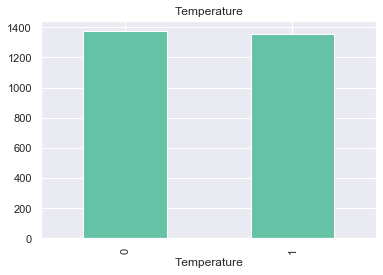

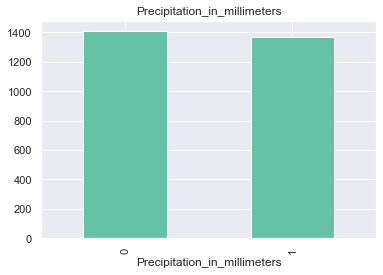

In [1610]:
for feature in features_with_na:
    data = df_clean.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['Time_from_Pickup_to_Arrival'].median().plot.bar() ## groupby to get relationship
    plt.title(feature)
    plt.show()



We can observe that when the null values(1) are high, the time from pickup to arrival has a high median thus we can say that
these missing values are important

In [1611]:
## We can also notice that certain categorical variables like order no, user ID and Rider ID wont be necessary
print("Order No {}".format(len(df_clean['Order_No'])))
print("User ID {}".format(len(df_clean['User_Id'])))
print("Rider ID {}".format(len(df_clean['Rider_Id'])))

Order No 21199
User ID 21199
Rider ID 21199


## Numerical Variables

In [1612]:
## determine which features are numerical
numerical_features = [feature for feature in df_clean.columns if df_clean[feature].dtypes != 'O'] ## 'O' means object

print('Number of numerical variables: ', len(numerical_features))


Number of numerical variables:  17


In [1613]:
# visualise the numerical variables
df_clean[numerical_features].head()

,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time_Placement_to_Confirmation,Time_Confirmation_to_PickupArrival,Time_Arrival_to_Pickup,Day_of_Month,Day_of_Week
0,4,20.40,nan,-1.32,36.83,-1.30,36.83,745,1637,1309,13.80,549,264,1477,1363,9,5
1,16,26.40,nan,-1.35,36.90,-1.30,36.81,1993,396,339,13.60,69,425,1021,227,12,5
2,3,nan,nan,-1.31,36.84,-1.30,36.83,455,1023,242,12.50,114,199,410,209,30,2
3,9,19.20,nan,-1.28,36.83,-1.26,36.80,1341,886,283,14.50,113,31,711,310,15,5
4,9,15.40,nan,-1.27,36.79,-1.30,36.81,1214,2311,872,14.10,533,60,455,90,13,1




we can see we have 19  numerical variables and some object variables may still need to be converted to datetime objects. Some Weekday numerical variable relate to dates(Day of weekday and day of month). We can maybe explore these to see how it affects our dependent variable. Some variables like Pickup lat also represent location describing variables.

### Temporal Variables

In [1614]:
weekday_feature = [feature for feature in numerical_features if 'Week' in feature]

weekday_feature

['Day_of_Week']

In [1615]:
month_feature = [feature for feature in numerical_features if 'Month' in feature]

month_feature

['Day_of_Month']



we can also observe that both month and weekday features are identical in all columns consisting of these values
this suggests that we can drop all columns later and just leave one to represent Weekday and Day of Month

Text(0.5, 1.0, "Weekday vs 'Time from Pickup to Arrival'")

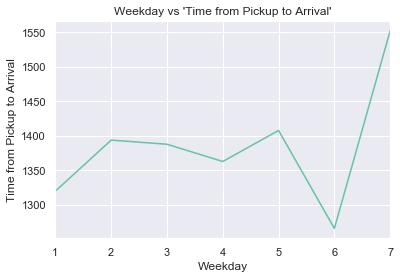

In [1616]:
## let us visualise using just one variabke of each as the representative variable
df_clean.groupby('Day_of_Week')['Time_from_Pickup_to_Arrival'].median().plot()
plt.xlabel('Weekday')
plt.ylabel('Time from Pickup to Arrival')
plt.title("Weekday vs 'Time from Pickup to Arrival'")


We can see that there is a steady time during the weekdays and then a sharp decrease in time on friday. We can also see a huge increase in time on Saturday.

Text(0.5, 1.0, "Month vs 'Time from Pickup to Arrival'")

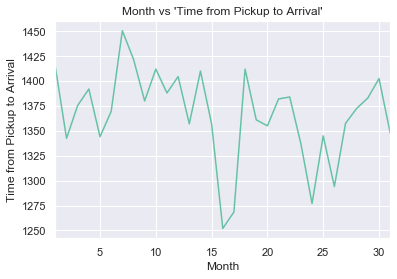

In [1617]:
df_clean.groupby('Day_of_Month')['Time_from_Pickup_to_Arrival'].median().plot()
plt.xlabel('Month')
plt.ylabel('Time from Pickup to Arrival')
plt.title("Month vs 'Time from Pickup to Arrival'")


Time taken to deliver is higher during the first periods of the month and decreases towards middle of the month with a slight increase then increasing again towards month end. These are periods related to salary pay days

Text(0.5, 1.0, "Pickup - Time vs 'Time from Pickup to Arrival'")

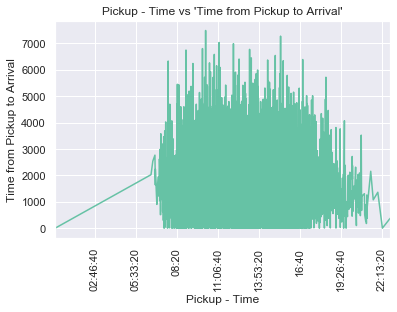

In [1618]:
## we can also try see how pickup time relates to the time difference from pickup to arrival
df_clean.groupby('Placement_Time')['Time_from_Pickup_to_Arrival'].median().plot()
plt.xlabel('Pickup - Time')
plt.xticks(rotation=90)
plt.ylabel('Time from Pickup to Arrival')
plt.title("Pickup - Time vs 'Time from Pickup to Arrival'")

We can confirm here that deliveries that take the longest time happen during the AMs but all times fluctuate differently as
the day goes

In [1619]:
## exploring if there are any discrete variables
discrete_feature=[feature for feature in numerical_features if len(df_clean[feature].unique())<25 and feature not in weekday_feature and feature not in month_feature+['Id', 'No']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [1620]:
discrete_feature ## no a discrete feature

[]

### Continuous Features

In [1621]:
## continuous feature
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+month_feature+['Id', 'No'] and feature not in weekday_feature ]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 15


In [1622]:
continuous_feature

['Distance_(KM)',
 'Temperature',
 'Precipitation_in_millimeters',
 'Pickup_Lat',
 'Pickup_Long',
 'Destination_Lat',
 'Destination_Long',
 'Time_from_Pickup_to_Arrival',
 'No_Of_Orders',
 'Age',
 'Average_Rating',
 'No_of_Ratings',
 'Time_Placement_to_Confirmation',
 'Time_Confirmation_to_PickupArrival',
 'Time_Arrival_to_Pickup']

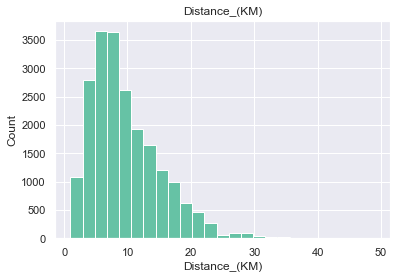

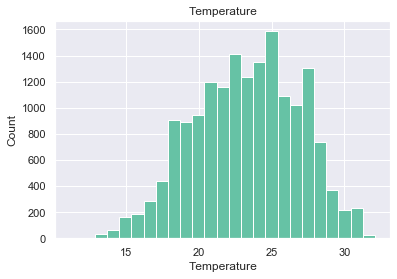

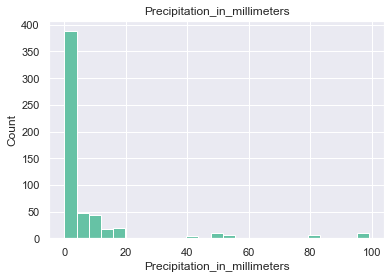

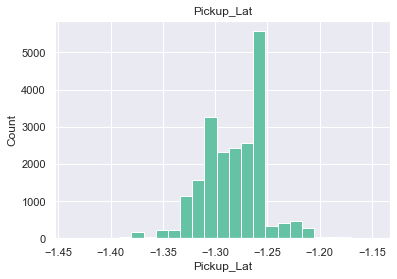

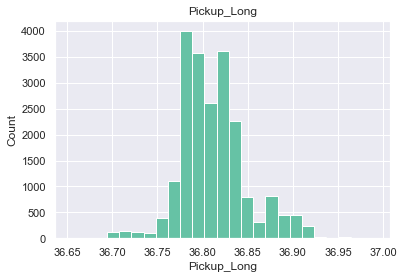

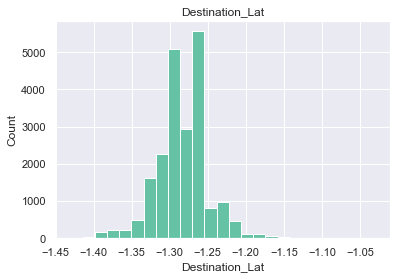

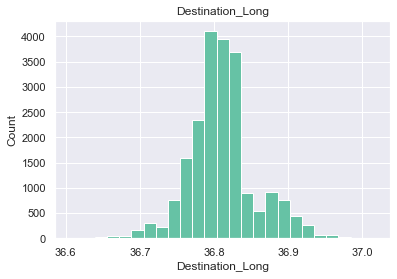

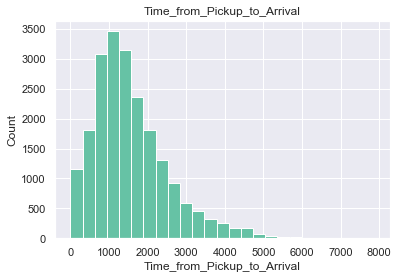

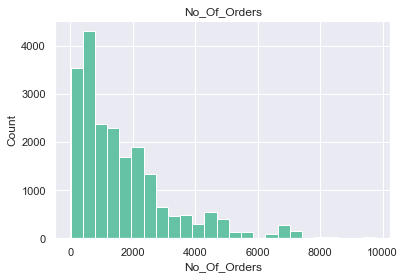

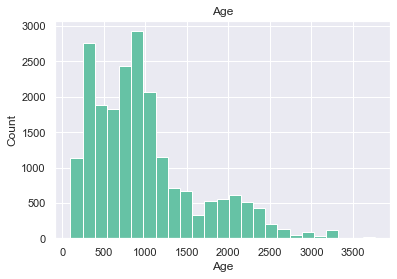

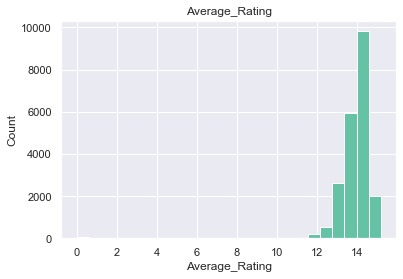

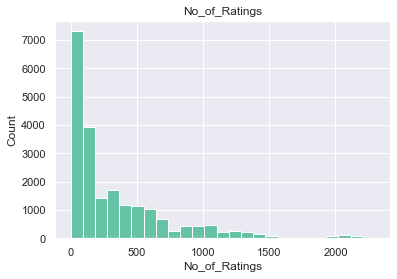

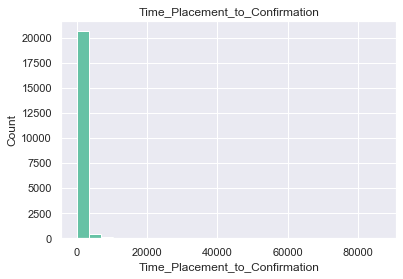

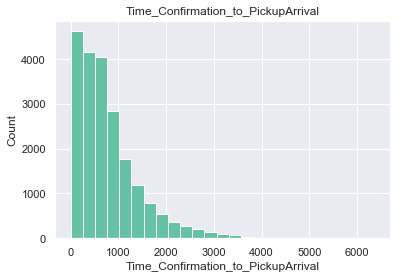

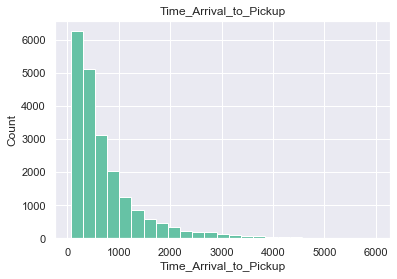

In [1623]:
## Lets analyse the continuous values by creating histograms to understand the distribution
for feature in continuous_feature:
    data=df_clean.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

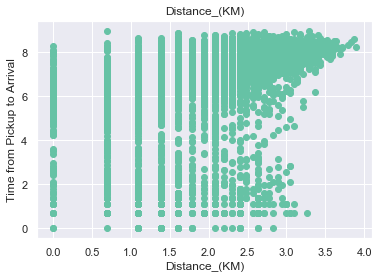

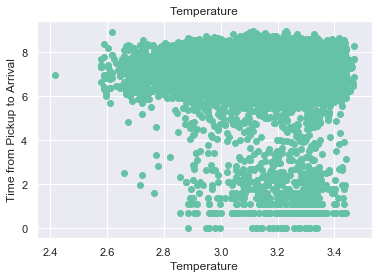

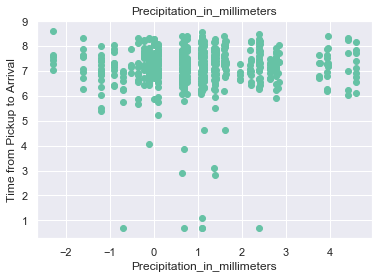

C:\Users\iman_\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


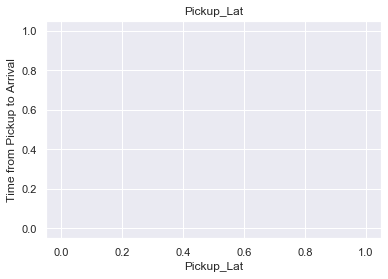

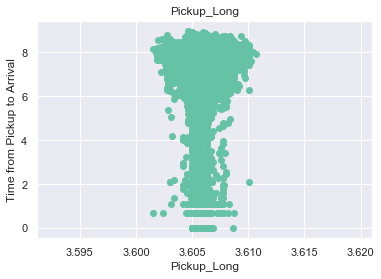

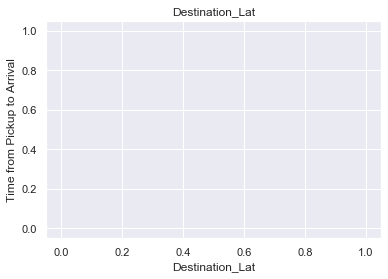

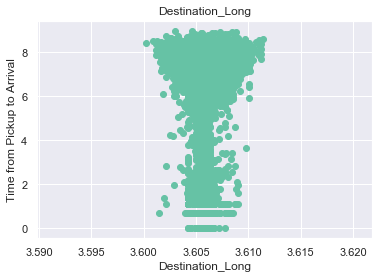

C:\Users\iman_\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


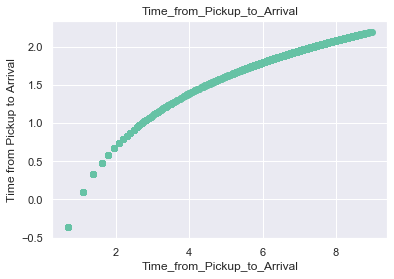

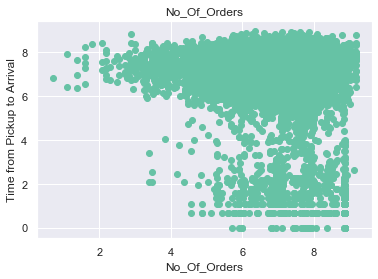

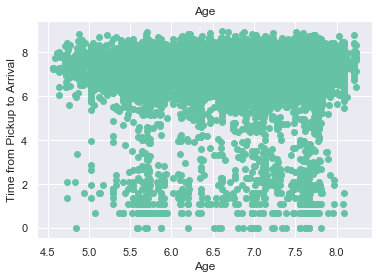

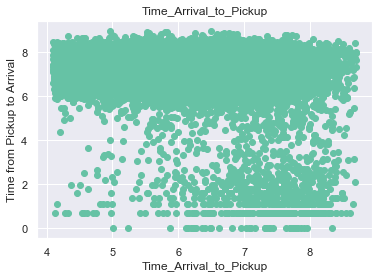

In [1624]:
## since we do not have much normally distributed data, and more exponential, we will try use logarythmic method to scale on our variables
## to see if their any changes
for feature in continuous_feature:
    data=df_clean.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Time from Pickup to Arrival']=np.log(data['Time_from_Pickup_to_Arrival'])
        plt.scatter(data[feature],data['Time from Pickup to Arrival'])
        plt.xlabel(feature)
        plt.ylabel('Time from Pickup to Arrival')
        plt.title(feature)
        plt.show()

Even once scaled logarythmically, we can see that these variables arent linearly correlating to our dependent variable.
this requires further analysis as logic tells us distance, rain condition and rider experience(Age) should affect delivery times

### Outliers

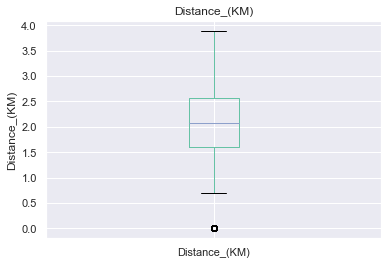

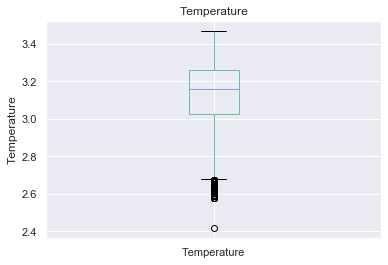

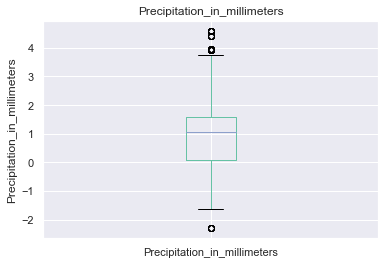

C:\Users\iman_\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


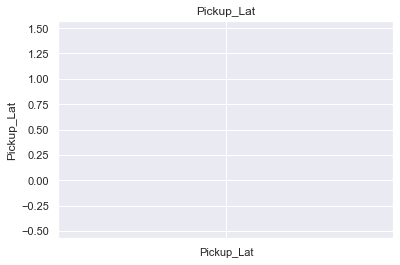

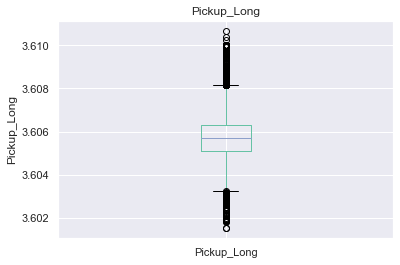

C:\Users\iman_\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


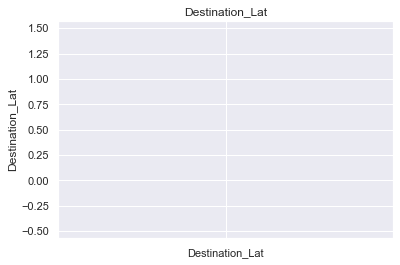

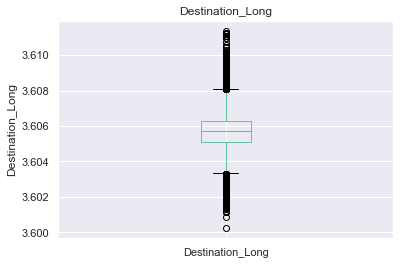

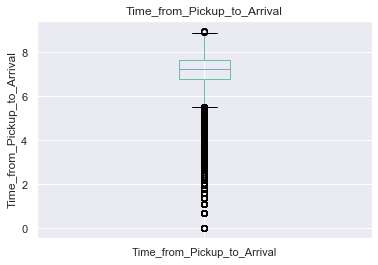

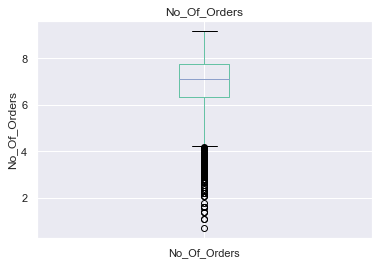

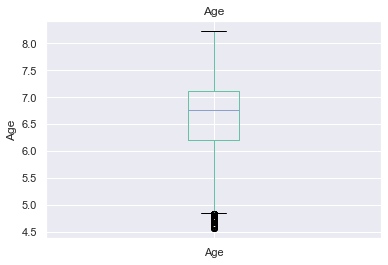

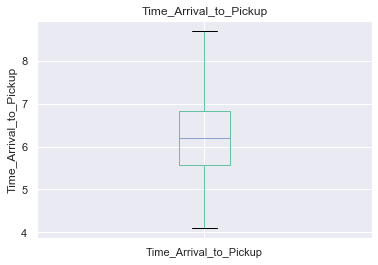

In [1625]:
## we will use a box and whisker plot to examine the outliers in our data
for feature in continuous_feature:
    data=df_clean.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Categorical Features

In [1626]:
df_clean.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time_Placement_to_Confirmation,Time_Confirmation_to_PickupArrival,Time_Arrival_to_Pickup,Day_of_Month,Day_of_Week
0,Order_No_4211,User_Id_633,Bike,plat_3,Business,09:35:46,4,20.40,nan,-1.32,36.83,-1.30,36.83,Rider_Id_432,745,1637,1309,13.80,549,264,1477,1363,9,5
1,Order_No_25375,User_Id_2285,Bike,plat_3,Personal,11:16:16,16,26.40,nan,-1.35,36.90,-1.30,36.81,Rider_Id_856,1993,396,339,13.60,69,425,1021,227,12,5
2,Order_No_1899,User_Id_265,Bike,plat_3,Business,12:39:25,3,nan,nan,-1.31,36.84,-1.30,36.83,Rider_Id_155,455,1023,242,12.50,114,199,410,209,30,2
3,Order_No_9336,User_Id_1402,Bike,plat_3,Business,09:25:34,9,19.20,nan,-1.28,36.83,-1.26,36.80,Rider_Id_855,1341,886,283,14.50,113,31,711,310,15,5
4,Order_No_27883,User_Id_1737,Bike,plat_1,Personal,09:55:18,9,15.40,nan,-1.27,36.79,-1.30,36.81,Rider_Id_770,1214,2311,872,14.10,533,60,455,90,13,1


In [1627]:
categorical_features=[feature for feature in df_clean.columns if data[feature].dtypes=='O' and 'Time' not in feature and  'Id' not in feature and 'No' not in feature]
categorical_features

['Vehicle_Type', 'Platform_Type', 'Personal_or_Business']

In [1628]:
df_clean[categorical_features].head()
## note that the datetime variables will be changed and that there is one more categorical variable, Platform type

,Vehicle_Type,Platform_Type,Personal_or_Business
0,Bike,plat_3,Business
1,Bike,plat_3,Personal
2,Bike,plat_3,Business
3,Bike,plat_3,Business
4,Bike,plat_1,Personal


In [1629]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_clean[feature].unique())))

The feature is Vehicle_Type and number of categories are 1
The feature is Platform_Type and number of categories are 4
The feature is Personal_or_Business and number of categories are 2


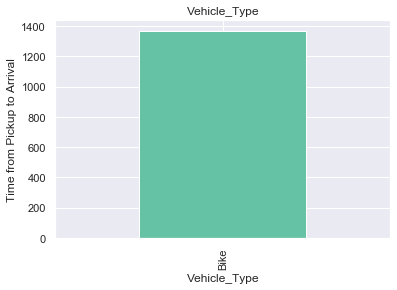

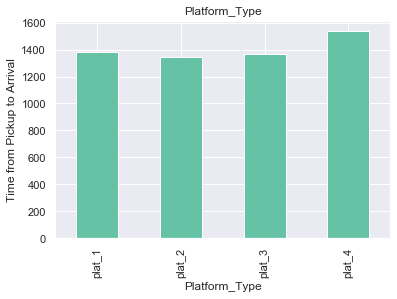

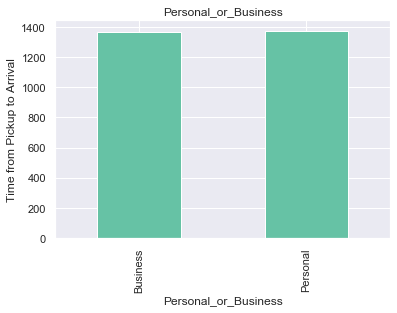

In [1630]:
## Lets Visualize the relationship between categorical variable and the dependent variable
for feature in categorical_features:
    data=df_clean.copy()
    data.groupby(feature)['Time_from_Pickup_to_Arrival'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Time from Pickup to Arrival')
    plt.title(feature)
    plt.show()

In [1631]:
## we use median to get rid of outliers when observing the data. Here we can see that there is a strong relationship between
## categorical variables and the dependent features

## Feature Engineering a cleaning Data (For training data)

In [1632]:
## we will do the same for the testing data

We will be performing all the below steps in Feature Engineering


1.Missing values

2.Temporal variables

3.Getting rid of outliers

4.Dropping columns

5.Standarise the values of the variables to the same range


### Missing data

In [1633]:
df_clean['Temperature'] = round(df_clean.groupby(['Day_of_Month'])['Temperature'].apply(lambda x: x.fillna(x.median())), 1)
df_clean['Precipitation_in_millimeters'].fillna(0.0, inplace = True)

In [1634]:
df_clean.isnull().sum()

Order_No                              0
User_Id                               0
Vehicle_Type                          0
Platform_Type                         0
Personal_or_Business                  0
Placement_Time                        0
Distance_(KM)                         0
Temperature                           0
Precipitation_in_millimeters          0
Pickup_Lat                            0
Pickup_Long                           0
Destination_Lat                       0
Destination_Long                      0
Rider_Id                              0
Time_from_Pickup_to_Arrival           0
No_Of_Orders                          0
Age                                   0
Average_Rating                        0
No_of_Ratings                         0
Time_Placement_to_Confirmation        0
Time_Confirmation_to_PickupArrival    0
Time_Arrival_to_Pickup                0
Day_of_Month                          0
Day_of_Week                           0
dtype: int64

We can now see that we do not have anymore null values in our training set

## Get Dummies For Categorical variables

Here we will get dummies and drop the first column of the dummy variables to avoid the dummy variable trap

In [1635]:
df_clean.drop(['Order_No', 'User_Id', 'Rider_Id', 'Placement_Time'], axis =1, inplace=True)

In [1636]:
df_clean = pd.get_dummies(df_clean, drop_first = True)

In [1637]:
df_clean 

,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time_Placement_to_Confirmation,Time_Confirmation_to_PickupArrival,Time_Arrival_to_Pickup,Day_of_Month,Day_of_Week,Platform_Type_plat_2,Platform_Type_plat_3,Platform_Type_plat_4,Personal_or_Business_Personal
0,4,20.40,0.00,-1.32,36.83,-1.30,36.83,745,1637,1309,13.80,549,264,1477,1363,9,5,0,1,0,0
1,16,26.40,0.00,-1.35,36.90,-1.30,36.81,1993,396,339,13.60,69,425,1021,227,12,5,0,1,0,1
2,3,22.70,0.00,-1.31,36.84,-1.30,36.83,455,1023,242,12.50,114,199,410,209,30,2,0,1,0,0
3,9,19.20,0.00,-1.28,36.83,-1.26,36.80,1341,886,283,14.50,113,31,711,310,15,5,0,1,0,0
4,9,15.40,0.00,-1.27,36.79,-1.30,36.81,1214,2311,872,14.10,533,60,455,90,13,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,3,28.60,0.00,-1.26,36.80,-1.28,36.80,9,1270,367,14.40,131,31,220,1279,20,3,0,1,0,1
21197,7,26.00,0.00,-1.31,36.83,-1.33,36.85,770,1023,242,12.50,114,7,383,803,13,6,0,1,0,0
21198,20,29.20,0.00,-1.29,36.90,-1.26,36.80,2953,314,473,13.80,29,53,1388,1235,7,4,0,1,0,0
21199,13,15.00,0.00,-1.25,36.87,-1.28,36.79,1380,2451,1821,14.00,1101,14,426,376,4,3,0,0,0,1


### Create a Scaled Dframe

 we will compare its performance compared to non scaled model

In [1638]:
cols = ['Platform_Type_plat_2',
       'Platform_Type_plat_3', 'Platform_Type_plat_4',
       'Personal_or_Business_Personal','Distance_(KM)', 'Temperature', 'Precipitation_in_millimeters',
       'Pickup_Lat', 'Pickup_Long', 'Destination_Lat', 'Destination_Long', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings', 'Time_Placement_to_Confirmation',
       'Time_Confirmation_to_PickupArrival', 'Time_Arrival_to_Pickup',
       'Day_of_Month', 'Day_of_Week','Time_from_Pickup_to_Arrival'] ##rearrange columns for train test split and feature selection

In [1639]:
df_clean = df_clean[cols]

In [1640]:
df_clean.head()

,Platform_Type_plat_2,Platform_Type_plat_3,Platform_Type_plat_4,Personal_or_Business_Personal,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time_Placement_to_Confirmation,Time_Confirmation_to_PickupArrival,Time_Arrival_to_Pickup,Day_of_Month,Day_of_Week,Time_from_Pickup_to_Arrival
0,0,1,0,0,4,20.40,0.00,-1.32,36.83,-1.30,36.83,1637,1309,13.80,549,264,1477,1363,9,5,745
1,0,1,0,1,16,26.40,0.00,-1.35,36.90,-1.30,36.81,396,339,13.60,69,425,1021,227,12,5,1993
2,0,1,0,0,3,22.70,0.00,-1.31,36.84,-1.30,36.83,1023,242,12.50,114,199,410,209,30,2,455
3,0,1,0,0,9,19.20,0.00,-1.28,36.83,-1.26,36.80,886,283,14.50,113,31,711,310,15,5,1341
4,0,0,0,1,9,15.40,0.00,-1.27,36.79,-1.30,36.81,2311,872,14.10,533,60,455,90,13,1,1214


In [1641]:
df_scaled = df_clean.copy()

In [1642]:
df_scaled.head()

,Platform_Type_plat_2,Platform_Type_plat_3,Platform_Type_plat_4,Personal_or_Business_Personal,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time_Placement_to_Confirmation,Time_Confirmation_to_PickupArrival,Time_Arrival_to_Pickup,Day_of_Month,Day_of_Week,Time_from_Pickup_to_Arrival
0,0,1,0,0,4,20.40,0.00,-1.32,36.83,-1.30,36.83,1637,1309,13.80,549,264,1477,1363,9,5,745
1,0,1,0,1,16,26.40,0.00,-1.35,36.90,-1.30,36.81,396,339,13.60,69,425,1021,227,12,5,1993
2,0,1,0,0,3,22.70,0.00,-1.31,36.84,-1.30,36.83,1023,242,12.50,114,199,410,209,30,2,455
3,0,1,0,0,9,19.20,0.00,-1.28,36.83,-1.26,36.80,886,283,14.50,113,31,711,310,15,5,1341
4,0,0,0,1,9,15.40,0.00,-1.27,36.79,-1.30,36.81,2311,872,14.10,533,60,455,90,13,1,1214


In [1643]:
feature_scale=[feature for feature in df_scaled.columns if feature not in ['Time_from_Pickup_to_Arrival']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df_scaled[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [1644]:
scaler.transform(df_scaled[feature_scale])

array([[0.        , 1.        , 0.        , ..., 0.21991561, 0.26666667,
        0.66666667],
       [0.        , 1.        , 0.        , ..., 0.02818565, 0.36666667,
        0.66666667],
       [0.        , 1.        , 0.        , ..., 0.02514768, 0.96666667,
        0.16666667],
       ...,
       [0.        , 1.        , 0.        , ..., 0.19831224, 0.2       ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.05333333, 0.1       ,
        0.33333333],
       [0.        , 1.        , 0.        , ..., 0.1664135 , 0.83333333,
        0.16666667]])

In [1645]:
data_scaled = pd.concat([df_scaled['Time_from_Pickup_to_Arrival'].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df_scaled[feature_scale]), columns=feature_scale)],
                    axis=1)

In [1646]:
data_scaled.head()

,Time_from_Pickup_to_Arrival,Platform_Type_plat_2,Platform_Type_plat_3,Platform_Type_plat_4,Personal_or_Business_Personal,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time_Placement_to_Confirmation,Time_Confirmation_to_PickupArrival,Time_Arrival_to_Pickup,Day_of_Month,Day_of_Week
0,745,0.00,1.00,0.00,0.00,0.06,0.44,0.00,0.41,0.52,0.32,0.54,0.17,0.33,0.91,0.24,0.00,0.23,0.22,0.27,0.67
1,1993,0.00,1.00,0.00,1.00,0.31,0.73,0.00,0.30,0.73,0.34,0.51,0.04,0.07,0.89,0.03,0.00,0.16,0.03,0.37,0.67
2,455,0.00,1.00,0.00,0.00,0.04,0.55,0.00,0.45,0.56,0.32,0.54,0.10,0.04,0.82,0.05,0.00,0.06,0.03,0.97,0.17
3,1341,0.00,1.00,0.00,0.00,0.17,0.38,0.00,0.54,0.53,0.43,0.46,0.09,0.05,0.95,0.05,0.00,0.11,0.04,0.47,0.67
4,1214,0.00,0.00,0.00,1.00,0.17,0.20,0.00,0.59,0.41,0.34,0.50,0.24,0.21,0.93,0.23,0.00,0.07,0.01,0.40,0.00


In [1647]:
df_scaled = data_scaled[cols]

In [1648]:
df_scaled.head()

,Platform_Type_plat_2,Platform_Type_plat_3,Platform_Type_plat_4,Personal_or_Business_Personal,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time_Placement_to_Confirmation,Time_Confirmation_to_PickupArrival,Time_Arrival_to_Pickup,Day_of_Month,Day_of_Week,Time_from_Pickup_to_Arrival
0,0.00,1.00,0.00,0.00,0.06,0.44,0.00,0.41,0.52,0.32,0.54,0.17,0.33,0.91,0.24,0.00,0.23,0.22,0.27,0.67,745
1,0.00,1.00,0.00,1.00,0.31,0.73,0.00,0.30,0.73,0.34,0.51,0.04,0.07,0.89,0.03,0.00,0.16,0.03,0.37,0.67,1993
2,0.00,1.00,0.00,0.00,0.04,0.55,0.00,0.45,0.56,0.32,0.54,0.10,0.04,0.82,0.05,0.00,0.06,0.03,0.97,0.17,455
3,0.00,1.00,0.00,0.00,0.17,0.38,0.00,0.54,0.53,0.43,0.46,0.09,0.05,0.95,0.05,0.00,0.11,0.04,0.47,0.67,1341
4,0.00,0.00,0.00,1.00,0.17,0.20,0.00,0.59,0.41,0.34,0.50,0.24,0.21,0.93,0.23,0.00,0.07,0.01,0.40,0.00,1214


#### Create a Standard Scaler Dframe

In [1649]:
df_st_scaled = df_clean.copy()

## Base Model 

1.Start with a normal unscaled base model

2.Next we will do a scaled model

### Unscaled Model

In [1650]:
## Linear Model
x = df_clean.iloc[:, :-1].values
y = df_clean.iloc[:, -1].values

### Train/Test Split

In [1651]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [1652]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1653]:
y_hat = reg.predict(x_train)

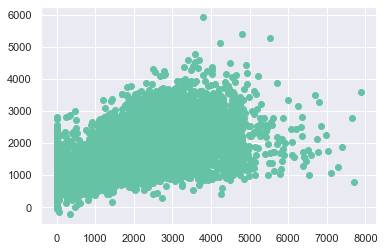

In [1654]:
plt.scatter(y_train, y_hat)
plt.show()

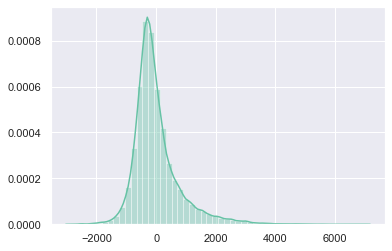

In [1655]:
## plot the residual (difference between targets and predictions)
sns.distplot(y_train - y_hat)

In [1656]:
reg.score(x_train, y_train)

0.37968855628238907

In [1657]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_train, y_hat))

In [1658]:
rmse

784.4159842067146

In [1659]:
from statsmodels.formula.api import ols
x1 = sm.add_constant(x)
results = sm.OLS(y,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     636.1
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        19:58:27   Log-Likelihood:            -1.7126e+05
No. Observations:               21199   AIC:                         3.426e+05
Df Residuals:                   21178   BIC:                         3.427e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.073e+04   6864.141      5.934      0.000    2.73e+04    5.42e+04
x1            11.2697     30.176      0.373      0.709     -47.878      70.418
x2            41.5992     24.783      1.679      0.093      -6.977      90.175
x3          -203.1819    176.504     -1.151      0.250    -549.144     142.780
x4            14.5260     21.505      0.675      0.499     -27.626      56.678
x5           102.5916      0.987    103.913      0.000     100.656     104.527
x6             5.1972      1.706      3.046      0.002       1.853       8.541
x7             1.3155      1.787      0.736      0.462      -2.187       4.818
x8           170.0741    181.779      0.936      0.349    -186.227     526.375
x9          -817.8988    149.357     -5.476      0.000   -1110.650    -525.148
x10         -538.8410    155.869     -3.457      0.001    -844.356    -233.326
x11         -273.9851    122.131     -2.243      0.025    -513.371     -34.599
x12           -0.0730      0.007    -10.300      0.000      -0.087      -0.059
x13            0.0145      0.012      1.261      0.207      -0.008       0.037
x14          -40.0539      5.909     -6.779      0.000     -51.635     -28.472
x15            0.2042      0.027      7.599      0.000       0.151       0.257
x16            0.0156      0.003      4.837      0.000       0.009       0.022
x17            0.1437      0.008     17.898      0.000       0.128       0.159
x18           -0.1573      0.007    -21.505      0.000      -0.172      -0.143
x19           -0.6848      0.611     -1.121      0.262      -1.882       0.512
x20            4.3885      3.436      1.277      0.202      -2.347      11.124
==============================================================================
Omnibus:                     7924.256   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39331.161
Skew:                           1.754   Prob(JB):                         0.00
Kurtosis:                       8.676   Cond. No.                     3.55e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Scaled Model

In [1660]:
## Scaled Linear Model
x_sc = df_scaled.iloc[:, :-1].values
y_sc = df_scaled.iloc[:, -1].values

In [1661]:
from sklearn.model_selection import train_test_split
x_train_sc, x_test_sc, y_train_sc, y_test_sc = train_test_split(x_sc, y_sc, test_size = 0.2, random_state = 1)

In [1662]:
reg_scaled = LinearRegression()
reg_scaled.fit(x_train_sc, y_train_sc)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1663]:
y_hat_scaled = reg_scaled.predict(x_train_sc)

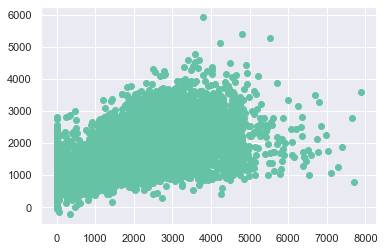

In [1664]:
plt.scatter(y_train_sc, y_hat_scaled)
plt.show()

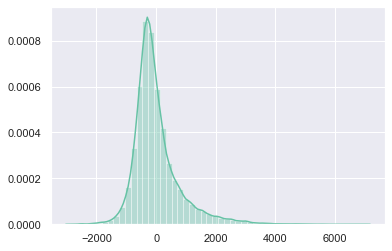

In [1665]:
sns.distplot(y_train_sc - y_hat_scaled)

In [1666]:
reg.score(x_train_sc, y_train_sc)

-1662.93921088195

In [1667]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_train_sc, y_hat_scaled))

rmse

784.4159842067147

In [1668]:
from statsmodels.formula.api import ols
x1 = sm.add_constant(x_sc)
results = sm.OLS(y_sc,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     636.1
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        19:58:29   Log-Likelihood:            -1.7126e+05
No. Observations:               21199   AIC:                         3.426e+05
Df Residuals:                   21178   BIC:                         3.427e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1406.8176    100.739     13.965      0.000    1209.362    1604.273
x1            11.2697     30.176      0.373      0.709     -47.878      70.418
x2            41.5992     24.783      1.679      0.093      -6.977      90.175
x3          -203.1819    176.504     -1.151      0.250    -549.144     142.780
x4            14.5260     21.505      0.675      0.499     -27.626      56.678
x5          4924.3980     47.390    103.913      0.000    4831.511    5017.285
x6           108.6220     35.655      3.046      0.002      38.736     178.508
x7           130.3663    177.107      0.736      0.462    -216.777     477.509
x8            49.5139     52.922      0.936      0.349     -54.216     153.244
x9          -275.9797     50.397     -5.476      0.000    -374.761    -177.198
x10         -215.5757     62.359     -3.457      0.001    -337.804     -93.347
x11         -112.3847     50.096     -2.243      0.025    -210.577     -14.192
x12         -712.2075     69.143    -10.300      0.000    -847.733    -576.682
x13           53.3000     42.266      1.261      0.207     -29.544     136.144
x14         -608.8195     89.812     -6.779      0.000    -784.858    -432.781
x15          469.1420     61.739      7.599      0.000     348.129     590.155
x16         1345.8026    278.216      4.837      0.000     800.478    1891.127
x17          915.9325     51.174     17.898      0.000     815.628    1016.237
x18         -932.2169     43.348    -21.505      0.000   -1017.182    -847.252
x19          -20.5440     18.320     -1.121      0.262     -56.453      15.365
x20           26.3310     20.617      1.277      0.202     -14.081      66.743
==============================================================================
Omnibus:                     7924.256   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39331.161
Skew:                           1.754   Prob(JB):                         0.00
Kurtosis:                       8.676   Cond. No.                         109.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



Looks like scaling doesnt improve the model

### Standard Scaler Model

In [1669]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

In [1670]:
y_for_scale = y.reshape(len(y),1)
scaled_x = sc_x.fit_transform(x_train)
scaled_y = sc_y.fit_transform(y_train.reshape(-1, 1))

In [1671]:
reg_std_scaled = LinearRegression()
reg_std_scaled.fit(scaled_x, scaled_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1672]:
y_std_scaled = reg_std_scaled.predict(scaled_x)

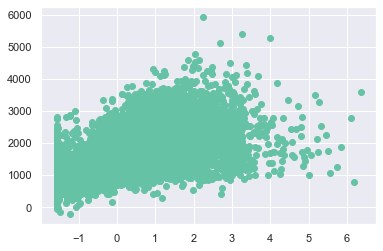

In [1673]:
plt.scatter(scaled_y, y_hat_scaled)
plt.show()

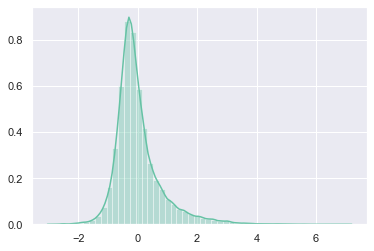

In [1674]:
sns.distplot(scaled_y - y_std_scaled)

In [1675]:
reg.score(scaled_x, scaled_y)

-1831332978.150038

we can conclude both scaling methods will not improve the model thus we will use the normal datafram
in our model and do backward elimination

In [1676]:
### before we move on, lets remove columns with insignificant p_values
df_sig_test = df_clean.copy()

In [1677]:
df_sig_test.columns

Index(['Platform_Type_plat_2', 'Platform_Type_plat_3', 'Platform_Type_plat_4',
       'Personal_or_Business_Personal', 'Distance_(KM)', 'Temperature',
       'Precipitation_in_millimeters', 'Pickup_Lat', 'Pickup_Long',
       'Destination_Lat', 'Destination_Long', 'No_Of_Orders', 'Age',
       'Average_Rating', 'No_of_Ratings', 'Time_Placement_to_Confirmation',
       'Time_Confirmation_to_PickupArrival', 'Time_Arrival_to_Pickup',
       'Day_of_Month', 'Day_of_Week', 'Time_from_Pickup_to_Arrival'],
      dtype='object')

In [1678]:
df_sig_test.drop(['Platform_Type_plat_2', 'Platform_Type_plat_3', 'Platform_Type_plat_4','Personal_or_Business_Personal'], axis = 1, inplace = True)

In [1679]:
x = df_sig_test.iloc[:, :-1].values
y = df_sig_test.iloc[:, -1].values

In [1680]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [1681]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1682]:
y_hat = reg.predict(x_train)

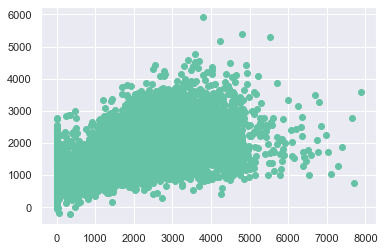

In [1683]:
plt.scatter(y_train, y_hat)
plt.show()

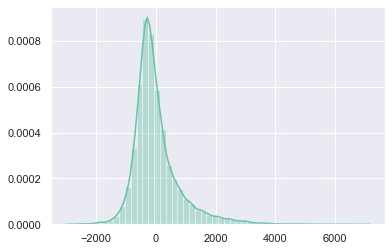

In [1684]:
sns.distplot(y_train- y_hat)

In [1685]:
reg.score(x_train, y_train)

0.37948384507024957

In [1686]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_train, y_hat))

rmse

784.5454075008257

In [1687]:
from statsmodels.formula.api import ols
x1 = sm.add_constant(x)
results = sm.OLS(y,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     794.7
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        19:58:33   Log-Likelihood:            -1.7126e+05
No. Observations:               21199   AIC:                         3.426e+05
Df Residuals:                   21182   BIC:                         3.427e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.05e+04   6848.947      5.913      0.000    2.71e+04    5.39e+04
x1           102.5772      0.987    103.911      0.000     100.642     104.512
x2             5.7756      1.665      3.468      0.001       2.511       9.040
x3             1.3520      1.787      0.757      0.449      -2.151       4.855
x4           174.8906    181.541      0.963      0.335    -180.943     530.724
x5          -817.4104    149.261     -5.476      0.000   -1109.973    -524.848
x6          -540.8025    155.844     -3.470      0.001    -846.268    -235.337
x7          -267.2420    121.917     -2.192      0.028    -506.208     -28.276
x8            -0.0719      0.007    -10.205      0.000      -0.086      -0.058
x9             0.0127      0.011      1.109      0.268      -0.010       0.035
x10          -40.1819      5.908     -6.801      0.000     -51.762     -28.602
x11            0.2013      0.027      7.515      0.000       0.149       0.254
x12            0.0156      0.003      4.847      0.000       0.009       0.022
x13            0.1433      0.008     17.892      0.000       0.128       0.159
x14           -0.1571      0.007    -21.509      0.000      -0.171      -0.143
x15           -0.6674      0.611     -1.093      0.274      -1.864       0.529
x16            3.9888      3.428      1.164      0.245      -2.730      10.707
==============================================================================
Omnibus:                     7930.414   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39410.163
Skew:                           1.755   Prob(JB):                         0.00
Kurtosis:                       8.682   Cond. No.                     3.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""




We can observe that from omitting certain p values, there isnt a significant change. Thus We will adopt this method after
doing other Feature Selection and efficiency techniques

## Feature Selection and Model Efficiency

1. We will deal with the outliers by exploring PDF of features
2. Explore VIF to measure the weights
3. Heatmap to explore Dependence Independence
4. Univariant Selection
5. Explore Backward Elimination to improve performance

### Explore PDF

In [1688]:
df_train_clean = df_clean.copy()

In [1689]:
df_train_clean

,Platform_Type_plat_2,Platform_Type_plat_3,Platform_Type_plat_4,Personal_or_Business_Personal,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time_Placement_to_Confirmation,Time_Confirmation_to_PickupArrival,Time_Arrival_to_Pickup,Day_of_Month,Day_of_Week,Time_from_Pickup_to_Arrival
0,0,1,0,0,4,20.40,0.00,-1.32,36.83,-1.30,36.83,1637,1309,13.80,549,264,1477,1363,9,5,745
1,0,1,0,1,16,26.40,0.00,-1.35,36.90,-1.30,36.81,396,339,13.60,69,425,1021,227,12,5,1993
2,0,1,0,0,3,22.70,0.00,-1.31,36.84,-1.30,36.83,1023,242,12.50,114,199,410,209,30,2,455
3,0,1,0,0,9,19.20,0.00,-1.28,36.83,-1.26,36.80,886,283,14.50,113,31,711,310,15,5,1341
4,0,0,0,1,9,15.40,0.00,-1.27,36.79,-1.30,36.81,2311,872,14.10,533,60,455,90,13,1,1214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,0,1,0,1,3,28.60,0.00,-1.26,36.80,-1.28,36.80,1270,367,14.40,131,31,220,1279,20,3,9
21197,0,1,0,0,7,26.00,0.00,-1.31,36.83,-1.33,36.85,1023,242,12.50,114,7,383,803,13,6,770
21198,0,1,0,0,20,29.20,0.00,-1.29,36.90,-1.26,36.80,314,473,13.80,29,53,1388,1235,7,4,2953
21199,0,0,0,1,13,15.00,0.00,-1.25,36.87,-1.28,36.79,2451,1821,14.00,1101,14,426,376,4,3,1380


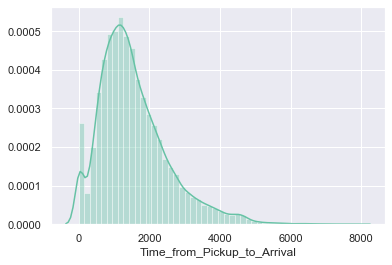

In [1690]:
sns.distplot(df_train_clean['Time_from_Pickup_to_Arrival']) ## exporing the depedent variable.
## it looks fairly normally distributed but you can see large outliers which we may have to deal with

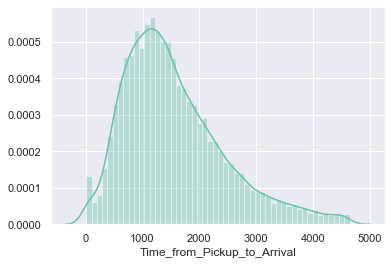

In [1691]:
q = df_train_clean['Time_from_Pickup_to_Arrival'].quantile(0.99)
data_1 = df_train_clean[(df_train_clean['Time_from_Pickup_to_Arrival']<q) & (df_train_clean['Time_from_Pickup_to_Arrival'] > 10)]
sns.distplot(data_1['Time_from_Pickup_to_Arrival'])

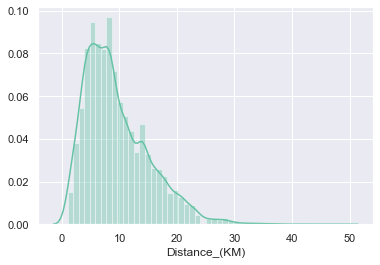

In [1692]:
sns.distplot(df_train_clean['Distance_(KM)']) ## here we observe outliers. This also may reveal that the larger the distance
## the higher the time from pickup to arrival

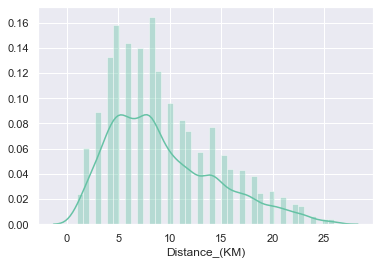

In [1693]:
p = df_train_clean['Distance_(KM)'].quantile(0.99)
data_2 = data_1[data_1['Distance_(KM)']<p]
sns.distplot(data_2['Distance_(KM)'])

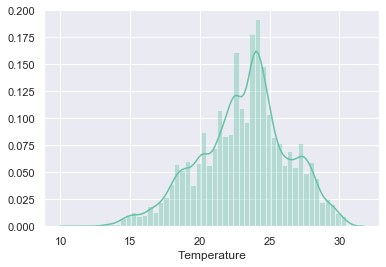

In [1694]:
p = df_train_clean['Temperature'].quantile(0.99)
data_3 = data_2[data_2['Temperature']<p]
sns.distplot(data_3['Temperature'])

In [1695]:
data_4 = data_3[data_3['Temperature'] >1]

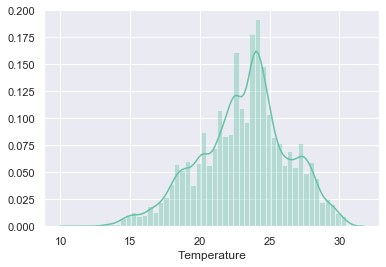

In [1696]:
sns.distplot(data_4['Temperature'])

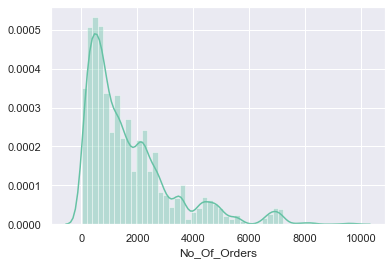

In [1697]:
sns.distplot(df_train_clean['No_Of_Orders'])

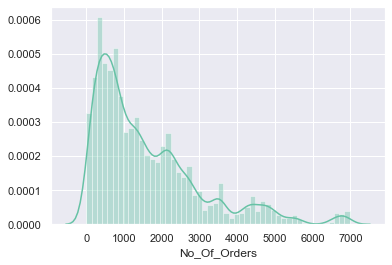

In [1698]:
p = df_train_clean['No_Of_Orders'].quantile(0.99)
data_5 = data_4[data_4['No_Of_Orders']<p]
sns.distplot(data_5['No_Of_Orders'])

In [1699]:
data_6 = data_5[data_5['No_Of_Orders']> 0.0]

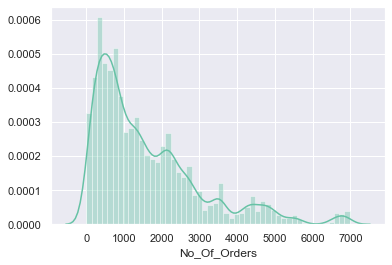

In [1700]:
sns.distplot(data_6['No_Of_Orders'])

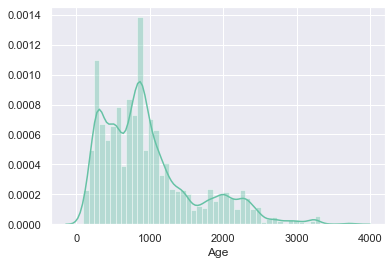

In [1701]:
sns.distplot(df_train_clean['Age'])

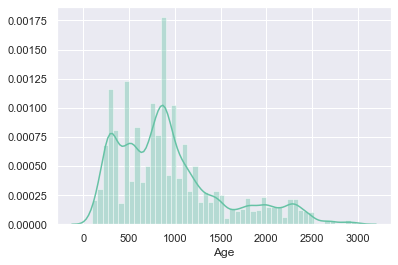

In [1702]:
z = df_train_clean['Age'].quantile(0.99)
data_7 = data_6[data_6['Age']<z]
sns.distplot(data_7['Age'])

In [1703]:
data_7 = data_6[data_6['Age'] > 1]

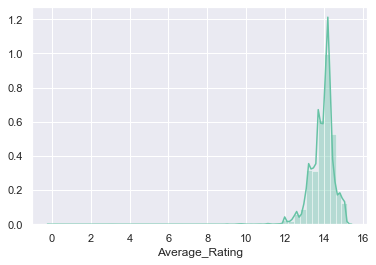

In [1704]:
sns.distplot(df_train_clean['Average_Rating'])

In [1705]:
data_8 = data_7[data_7['Average_Rating'] > 0]

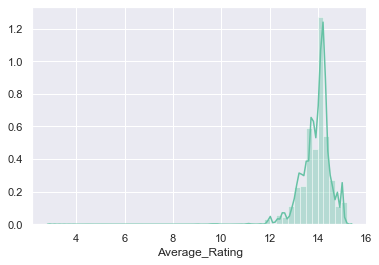

In [1706]:
sns.distplot(data_8['Average_Rating'])

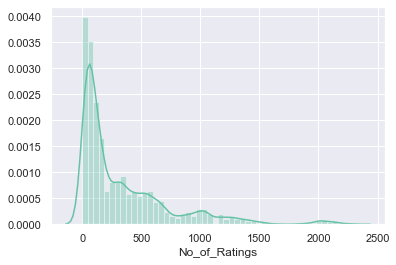

In [1707]:
sns.distplot(df_train_clean['No_of_Ratings'])

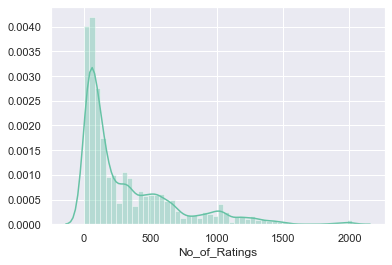

In [1708]:
u = df_train_clean['No_of_Ratings'].quantile(0.99)
data_9 = data_8[data_8['No_of_Ratings']<u]
sns.distplot(data_9['No_of_Ratings'])

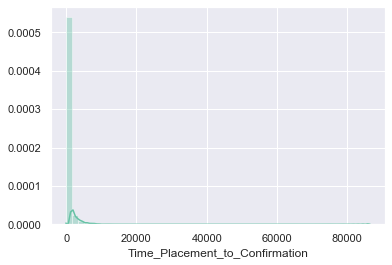

In [1709]:
sns.distplot(df_train_clean['Time_Placement_to_Confirmation'])

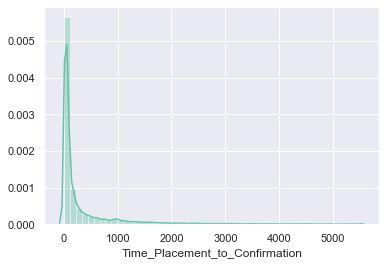

In [1710]:
u = df_train_clean['Time_Placement_to_Confirmation'].quantile(0.99)
data_10 = data_9[(data_9['Time_Placement_to_Confirmation']<u) & (data_9['Time_Placement_to_Confirmation']>5.0)]
sns.distplot(data_10['Time_Placement_to_Confirmation'])

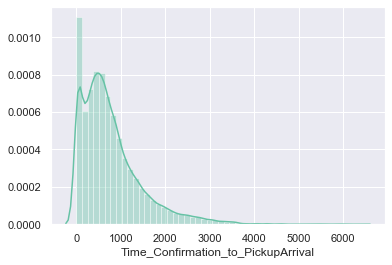

In [1711]:
sns.distplot(df_train_clean['Time_Confirmation_to_PickupArrival'])

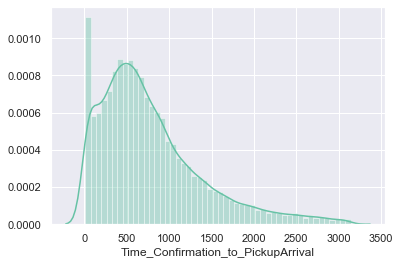

In [1712]:
u = df_train_clean['Time_Confirmation_to_PickupArrival'].quantile(0.99)
data_11 = data_10[(data_10['Time_Confirmation_to_PickupArrival']<u) & (data_10['Time_Confirmation_to_PickupArrival']>10.0)]
sns.distplot(data_11['Time_Confirmation_to_PickupArrival'])

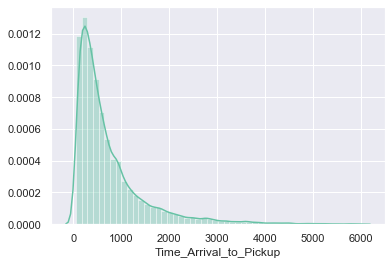

In [1713]:
sns.distplot(df_train_clean['Time_Arrival_to_Pickup'])

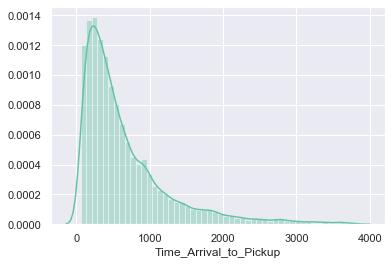

In [1714]:
u = df_train_clean['Time_Arrival_to_Pickup'].quantile(0.99)
data_12 = data_11[data_11['Time_Arrival_to_Pickup']<u]
sns.distplot(data_12['Time_Arrival_to_Pickup'])

In [1715]:
data_12.describe(include='all')

,Platform_Type_plat_2,Platform_Type_plat_3,Platform_Type_plat_4,Personal_or_Business_Personal,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time_Placement_to_Confirmation,Time_Confirmation_to_PickupArrival,Time_Arrival_to_Pickup,Day_of_Month,Day_of_Week,Time_from_Pickup_to_Arrival
count,18357.00,18357.00,18357.00,18357.00,18357.00,18357.00,18357.00,18357.00,18357.00,18357.00,18357.00,18357.00,18357.00,18357.00,18357.00,18357.00,18357.00,18357.00,18357.00,18357.00,18357.00
mean,0.05,0.84,0.00,0.19,9.25,23.14,0.21,-1.28,36.81,-1.28,36.81,1528.96,940.97,13.93,313.24,372.37,781.94,662.94,15.64,3.24,1542.90
std,0.22,0.37,0.03,0.39,5.23,3.20,3.14,0.03,0.04,0.03,0.04,1306.98,604.47,0.60,355.57,768.30,608.94,613.76,8.79,1.57,869.40
min,0.00,0.00,0.00,0.00,1.00,11.20,0.00,-1.43,36.66,-1.43,36.64,5.00,96.00,3.00,2.00,6.00,11.00,60.00,1.00,1.00,11.00
25%,0.00,1.00,0.00,0.00,5.00,21.20,0.00,-1.30,36.78,-1.30,36.79,532.00,494.00,13.70,60.00,28.00,350.00,252.00,8.00,2.00,913.00
50%,0.00,1.00,0.00,0.00,8.00,23.50,0.00,-1.28,36.80,-1.28,36.81,1155.00,854.00,14.10,151.00,71.00,639.00,461.00,15.00,3.00,1375.00
75%,0.00,1.00,0.00,0.00,12.00,25.10,0.00,-1.26,36.83,-1.26,36.83,2183.00,1149.00,14.30,466.00,283.00,1053.00,859.00,23.00,5.00,2007.00
max,1.00,1.00,1.00,1.00,26.00,30.50,99.10,-1.15,36.99,-1.12,36.98,6978.00,3543.00,15.20,2018.00,5493.00,3139.00,3803.00,31.00,7.00,4648.00


In [1716]:
df_no_outliers = data_12.reset_index(drop=True)

In [1717]:
df_no_outliers

,Platform_Type_plat_2,Platform_Type_plat_3,Platform_Type_plat_4,Personal_or_Business_Personal,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time_Placement_to_Confirmation,Time_Confirmation_to_PickupArrival,Time_Arrival_to_Pickup,Day_of_Month,Day_of_Week,Time_from_Pickup_to_Arrival
0,0,1,0,0,4,20.40,0.00,-1.32,36.83,-1.30,36.83,1637,1309,13.80,549,264,1477,1363,9,5,745
1,0,1,0,1,16,26.40,0.00,-1.35,36.90,-1.30,36.81,396,339,13.60,69,425,1021,227,12,5,1993
2,0,1,0,0,3,22.70,0.00,-1.31,36.84,-1.30,36.83,1023,242,12.50,114,199,410,209,30,2,455
3,0,1,0,0,9,19.20,0.00,-1.28,36.83,-1.26,36.80,886,283,14.50,113,31,711,310,15,5,1341
4,0,0,0,1,9,15.40,0.00,-1.27,36.79,-1.30,36.81,2311,872,14.10,533,60,455,90,13,1,1214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18352,0,1,0,0,16,24.30,0.00,-1.26,36.80,-1.32,36.71,526,286,13.60,70,43,321,422,15,1,2298
18353,0,1,0,0,17,29.00,0.00,-1.24,36.87,-1.28,36.77,20,378,15.00,5,1026,1591,145,2,6,2325
18354,0,1,0,0,7,26.00,0.00,-1.31,36.83,-1.33,36.85,1023,242,12.50,114,7,383,803,13,6,770
18355,0,1,0,0,20,29.20,0.00,-1.29,36.90,-1.26,36.80,314,473,13.80,29,53,1388,1235,7,4,2953


#### Univariant Test

In [1718]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [1719]:
X = df_no_outliers.iloc[:,:-1]
y = df_no_outliers.iloc[:,-1]

In [1720]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(abs(X),y)

In [1721]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [1722]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [1723]:
featureScores

,Specs,Score
0,Platform_Type_plat_2,3228.50
1,Platform_Type_plat_3,550.28
2,Platform_Type_plat_4,5693.25
3,Personal_or_Business_Personal,2808.78
4,Distance_(KM),31728.76
5,Temperature,1583.22
6,Precipitation_in_millimeters,156821.10
7,Pickup_Lat,3.03
8,Pickup_Long,0.16
9,Destination_Lat,4.01


In [1724]:
print(featureScores.nlargest(20,'Score'))

                                 Specs      Score
15      Time_Placement_to_Confirmation 6152009.49
11                        No_Of_Orders 4293673.62
17              Time_Arrival_to_Pickup 2372148.94
16  Time_Confirmation_to_PickupArrival 2172189.51
14                       No_of_Ratings 1536122.69
12                                 Age 1500852.38
6         Precipitation_in_millimeters  156821.10
4                        Distance_(KM)   31728.76
18                        Day_of_Month   18373.36
2                 Platform_Type_plat_4    5693.25
0                 Platform_Type_plat_2    3228.50
19                         Day_of_Week    2809.83
3        Personal_or_Business_Personal    2808.78
5                          Temperature    1583.22
1                 Platform_Type_plat_3     550.28
13                      Average_Rating     113.88
9                      Destination_Lat       4.01
7                           Pickup_Lat       3.03
10                    Destination_Long       0.23


### Correlation Matrix

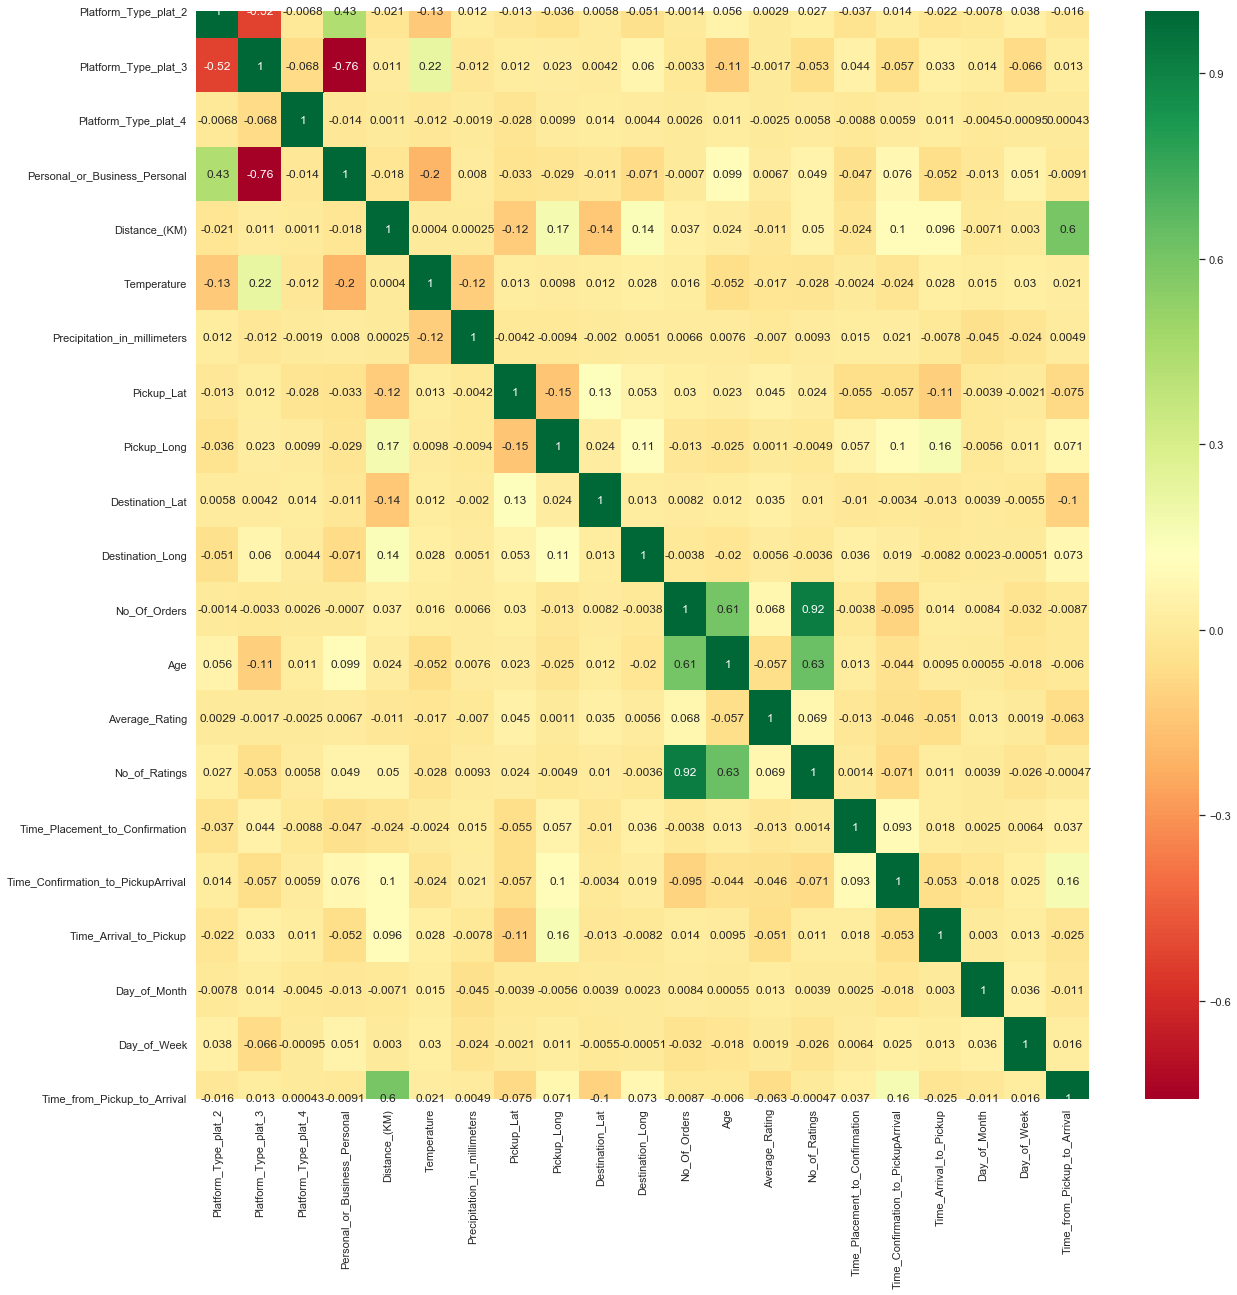

In [1725]:
corrmat = df_no_outliers.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_no_outliers[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Measure Weight of Features

In [1726]:
df_no_outliers.columns

Index(['Platform_Type_plat_2', 'Platform_Type_plat_3', 'Platform_Type_plat_4',
       'Personal_or_Business_Personal', 'Distance_(KM)', 'Temperature',
       'Precipitation_in_millimeters', 'Pickup_Lat', 'Pickup_Long',
       'Destination_Lat', 'Destination_Long', 'No_Of_Orders', 'Age',
       'Average_Rating', 'No_of_Ratings', 'Time_Placement_to_Confirmation',
       'Time_Confirmation_to_PickupArrival', 'Time_Arrival_to_Pickup',
       'Day_of_Month', 'Day_of_Week', 'Time_from_Pickup_to_Arrival'],
      dtype='object')

In [1727]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df_no_outliers[['Platform_Type_plat_2', 'Platform_Type_plat_3', 'Platform_Type_plat_4',
       'Personal_or_Business_Personal', 'Distance_(KM)', 'Temperature',
       'Precipitation_in_millimeters', 'Pickup_Lat', 'Pickup_Long',
       'Destination_Lat', 'Destination_Long', 'No_Of_Orders', 'Age',
       'Average_Rating', 'No_of_Ratings', 'Time_Placement_to_Confirmation',
       'Time_Confirmation_to_PickupArrival', 'Time_Arrival_to_Pickup',
       'Day_of_Month', 'Day_of_Week']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [1728]:
vif

,VIF,features
0,1.46,Platform_Type_plat_2
1,17.08,Platform_Type_plat_3
2,1.02,Platform_Type_plat_4
3,2.99,Personal_or_Business_Personal
4,4.35,Distance_(KM)
5,57.81,Temperature
6,1.02,Precipitation_in_millimeters
7,1984.25,Pickup_Lat
8,499448.14,Pickup_Long
9,1527.68,Destination_Lat



From testing our features for importance and mutlicollinearity we can see that the Lat Lon values can be dropped as
they are of no importance and have a weight higher than 10. No of orders and no of ratings are highly correlated so we will
drop one of them. Platform 3 can also be dropped as it shows low significance and high weighting. Average Ratings can also be dropped. Temperature can also be dropped

In [1793]:
df_no_outliers.drop(['Platform_Type_plat_3', 'No_of_Ratings', 'Average_Rating','Pickup_Lat', 'Pickup_Long','Destination_Lat', 'Destination_Long', 'Temperature', 'No_Of_Orders'], axis= 1, inplace = True)

KeyError: "['Platform_Type_plat_3' 'No_of_Ratings' 'Average_Rating' 'Pickup_Lat'\n 'Pickup_Long' 'Destination_Lat' 'Destination_Long' 'Temperature'] not found in axis"

In [1730]:
df_no_outliers.head()

,Platform_Type_plat_2,Platform_Type_plat_4,Personal_or_Business_Personal,Distance_(KM),Precipitation_in_millimeters,No_Of_Orders,Age,Time_Placement_to_Confirmation,Time_Confirmation_to_PickupArrival,Time_Arrival_to_Pickup,Day_of_Month,Day_of_Week,Time_from_Pickup_to_Arrival
0,0,0,0,4,0.00,1637,1309,264,1477,1363,9,5,745
1,0,0,1,16,0.00,396,339,425,1021,227,12,5,1993
2,0,0,0,3,0.00,1023,242,199,410,209,30,2,455
3,0,0,0,9,0.00,886,283,31,711,310,15,5,1341
4,0,0,1,9,0.00,2311,872,60,455,90,13,1,1214


## Linear Regression Model

In [1731]:
x = df_no_outliers.iloc[:, :-1].values
y = df_no_outliers.iloc[:, -1].values

In [1732]:
X = df_no_outliers.iloc[:, :-1]

In [1733]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [1734]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1735]:
y_hat = reg.predict(x_train)

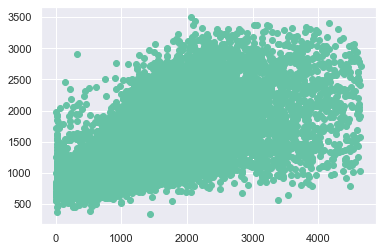

In [1736]:
plt.scatter(y_train, y_hat)
plt.show()

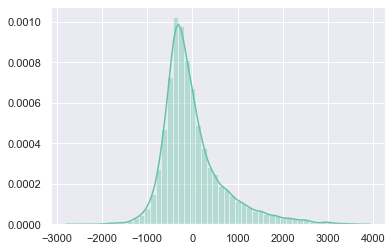

In [1737]:
## plot the residual (difference between targets and predictions)
sns.distplot(y_train - y_hat)

In [1738]:
reg.score(x_train, y_train)

0.37723625489858814

In [1739]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_train, y_hat))

rmse

686.1123283775393

### Finding the Weights and Bias

In [1740]:
reg.intercept_

604.4610939112803

In [1741]:
reg.coef_

array([-2.36242334e+01, -5.63254523e+00, -1.51548634e+01,  9.99388815e+01,
        8.91154318e-01, -7.36812477e-03, -1.48945307e-02,  5.67565900e-02,
        1.25280258e-01, -1.17408636e-01, -9.99875705e-01,  6.24880562e+00])

In [1742]:
reg_summary = pd.DataFrame(X.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Platform_Type_plat_2,-23.62
1,Platform_Type_plat_4,-5.63
2,Personal_or_Business_Personal,-15.15
3,Distance_(KM),99.94
4,Precipitation_in_millimeters,0.89
5,No_Of_Orders,-0.01
6,Age,-0.01
7,Time_Placement_to_Confirmation,0.06
8,Time_Confirmation_to_PickupArrival,0.13
9,Time_Arrival_to_Pickup,-0.12


## Testing

In [1743]:
y_hat_test = reg.predict(x_test)

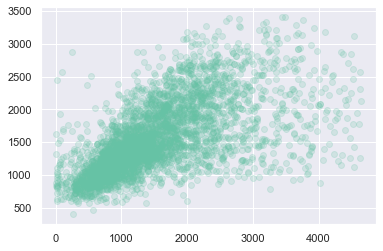

In [1744]:
plt.scatter(y_test, y_hat_test, alpha = 0.2)

In [1745]:
df_pf = pd.DataFrame(y_hat_test, columns=['Predictions'])

In [1746]:
y_test_ = pd.DataFrame(y_test, columns = ['Targets'])

In [1747]:
y_test_

,Targets
0,2645
1,2205
2,1878
3,1007
4,779
...,...
3667,2448
3668,1407
3669,546
3670,1415


In [1748]:
df_pf

,Predictions
0,3385.54
1,2031.41
2,2684.70
3,1300.53
4,993.22
...,...
3667,1963.45
3668,2187.74
3669,929.95
3670,1668.89


In [1749]:
df_pf['Target'] = y_test_

In [1750]:
df_pf

,Predictions,Target
0,3385.54,2645
1,2031.41,2205
2,2684.70,1878
3,1300.53,1007
4,993.22,779
...,...,...
3667,1963.45,2448
3668,2187.74,1407
3669,929.95,546
3670,1668.89,1415


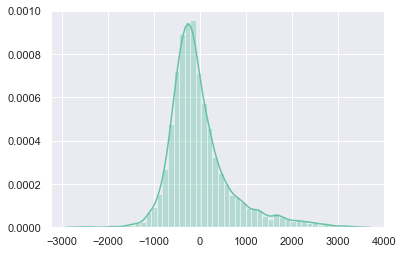

In [1751]:
sns.distplot(y_test - y_hat_test)

In [1752]:
df_pf['Residuals'] = df_pf['Target'] - df_pf['Predictions']

In [1753]:
df_pf['Difference %'] = np.absolute(df_pf['Residuals']/df_pf['Target']*100)

In [1754]:
pd.options.display.max_rows = 3000
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference %'])

,Predictions,Target,Residuals,Difference %
1086,2067.96,2068,0.04,0.00
1616,2542.36,2542,-0.36,0.01
321,1326.44,1326,-0.44,0.03
1705,1791.19,1792,0.81,0.05
249,1486.75,1486,-0.75,0.05
...,...,...,...,...
1642,870.15,12,-858.15,7151.27
2586,834.48,11,-823.48,7486.22
378,1324.85,11,-1313.85,11944.09
471,2442.78,17,-2425.78,14269.32


In [1755]:
df_pf.describe(include='all')

,Predictions,Target,Residuals,Difference %
count,3672.00,3672.00,3672.00,3672.00
mean,1558.39,1546.53,-11.87,83.17
std,544.39,869.29,684.09,542.19
min,397.74,11.00,-2629.65,0.00
25%,1148.58,912.75,-423.37,12.35
50%,1455.49,1379.00,-156.85,27.20
75%,1904.45,2036.50,217.28,50.34
max,3410.94,4643.00,3411.84,14614.68


In [1756]:
reg.score(x_test, y_test)

0.3805307047272083

In [1757]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_hat_test))

rmse

684.0952807174021

## Polynomial

## Prepare the unseen test set

In [1758]:
df_test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,nan,nan,-1.33,36.87,-1.31,36.82,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,nan,nan,-1.27,36.79,-1.28,36.82,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.80,nan,-1.29,36.82,-1.28,36.85,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.50,nan,-1.29,36.81,-1.30,36.79,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.40,nan,-1.28,36.81,-1.27,36.79,Rider_Id_858


In [1759]:
df_test = df_test.merge(df_rider, how='left', left_on = 'Rider Id', right_on = 'Rider Id')

In [1760]:
df_test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,nan,nan,-1.33,36.87,-1.31,36.82,Rider_Id_192,439,1511,13.30,171
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,nan,nan,-1.27,36.79,-1.28,36.82,Rider_Id_868,488,273,14.40,45
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.80,nan,-1.29,36.82,-1.28,36.85,Rider_Id_26,833,460,13.10,67
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.50,nan,-1.29,36.81,-1.30,36.79,Rider_Id_685,487,560,13.70,44
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.40,nan,-1.28,36.81,-1.27,36.79,Rider_Id_858,4761,1120,14.10,1010


In [1761]:
## lets clean up the column names to have the same naming convention
df_test.columns = [i.replace(' ', '_') for i in df_test.columns]
df_test.columns = [i.replace('-', '') for i in df_test.columns]
df_test.columns = [i.replace('__', '_') for i in df_test.columns]
df_test.columns

Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement_Day_of_Month',
       'Placement_Weekday_(Mo_=_1)', 'Placement_Time',
       'Confirmation_Day_of_Month', 'Confirmation_Weekday_(Mo_=_1)',
       'Confirmation_Time', 'Arrival_at_Pickup_Day_of_Month',
       'Arrival_at_Pickup_Weekday_(Mo_=_1)', 'Arrival_at_Pickup_Time',
       'Pickup_Day_of_Month', 'Pickup_Weekday_(Mo_=_1)', 'Pickup_Time',
       'Distance_(KM)', 'Temperature', 'Precipitation_in_millimeters',
       'Pickup_Lat', 'Pickup_Long', 'Destination_Lat', 'Destination_Long',
       'Rider_Id', 'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings'],
      dtype='object')

In [1762]:
## convert time objects to datetime objects
df_test['Placement_Time'] = pd.to_datetime(df_test['Placement_Time'])
df_test['Confirmation_Time'] = pd.to_datetime(df_test['Confirmation_Time'])
df_test['Arrival_at_Pickup_Time'] = pd.to_datetime(df_test['Arrival_at_Pickup_Time'])
df_test['Pickup_Time'] = pd.to_datetime(df_test['Pickup_Time'])

In [1763]:
### change time variables to difference in time in seconds to keep time stationary and appropriate for our model
df_test['Time_Placement_to_Confirmation'] = (df_test['Confirmation_Time'] - df_test['Placement_Time']).dt.seconds
df_test['Time_Confirmation_to_PickupArrival'] = (df_test['Arrival_at_Pickup_Time'] - df_test['Confirmation_Time']).dt.seconds
df_test['Time_Arrival_to_Pickup'] = (df_test['Pickup_Time'] - df_test['Arrival_at_Pickup_Time']).dt.seconds

In [1764]:
### drop the old columns. Note we will keep one for analysis purposes 'Placement_Time'
df_test.drop(['Confirmation_Time', 'Arrival_at_Pickup_Time', "Pickup_Time"], axis= 1, inplace=True)

In [1765]:
## next we will leave only two columns, day of month and day_of_week and drop all other columns
df_test['Day_of_Month'] = df_test['Placement_Day_of_Month']
df_test['Day_of_Week'] = df_test['Confirmation_Weekday_(Mo_=_1)']

In [1766]:
## drop all other columns relating to the day of month and day of week
df_test.drop(['Placement_Day_of_Month','Placement_Weekday_(Mo_=_1)', 'Confirmation_Day_of_Month', 'Confirmation_Weekday_(Mo_=_1)', 'Arrival_at_Pickup_Day_of_Month',
       'Arrival_at_Pickup_Weekday_(Mo_=_1)', 'Pickup_Day_of_Month', 'Pickup_Weekday_(Mo_=_1)'], axis = 1, inplace = True)

In [1767]:
## Note we need to convert platform type from numeric to categorical since its categorical
df_test['Platform_Type'] = df_test['Platform_Type'].map({3: 'plat_3', 1: 'plat_1', 2: 'plat_2', 4:'plat_4'})

In [1768]:
df_test.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time_Placement_to_Confirmation,Time_Confirmation_to_PickupArrival,Time_Arrival_to_Pickup,Day_of_Month,Day_of_Week
0,Order_No_19248,User_Id_3355,Bike,plat_3,Business,2020-05-28 16:44:10,8,nan,nan,-1.33,36.87,-1.31,36.82,Rider_Id_192,439,1511,13.30,171,19,515,823,27,3
1,Order_No_12736,User_Id_3647,Bike,plat_3,Business,2020-05-28 12:57:35,5,nan,nan,-1.27,36.79,-1.28,36.82,Rider_Id_868,488,273,14.40,45,102,1270,310,17,5
2,Order_No_768,User_Id_2154,Bike,plat_3,Business,2020-05-28 11:08:14,5,22.80,nan,-1.29,36.82,-1.28,36.85,Rider_Id_26,833,460,13.10,67,1011,495,1474,27,4
3,Order_No_15332,User_Id_2910,Bike,plat_3,Business,2020-05-28 13:51:35,5,24.50,nan,-1.29,36.81,-1.30,36.79,Rider_Id_685,487,560,13.70,44,112,554,851,17,1
4,Order_No_21373,User_Id_1205,Bike,plat_3,Business,2020-05-28 11:30:28,6,24.40,nan,-1.28,36.81,-1.27,36.79,Rider_Id_858,4761,1120,14.10,1010,257,754,525,11,2


In [1769]:
df_test['Temperature'] = round(df_test.groupby(['Day_of_Month'])['Temperature'].apply(lambda x: x.fillna(x.median())), 1)
df_test['Precipitation_in_millimeters'].fillna(0.0, inplace = True)

In [1770]:
df_test.set_index(['Order_No'], inplace = True)

In [1771]:
df_test.drop(['User_Id', 'Rider_Id', 'Placement_Time'], axis =1, inplace=True)

In [1772]:
df_test = pd.get_dummies(df_test, drop_first = True)

In [1773]:
df_test

,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time_Placement_to_Confirmation,Time_Confirmation_to_PickupArrival,Time_Arrival_to_Pickup,Day_of_Month,Day_of_Week,Platform_Type_plat_2,Platform_Type_plat_3,Platform_Type_plat_4,Personal_or_Business_Personal
Order_No,,,,,,,,,,,,,,,,,,,,
Order_No_19248,8,23.70,0.00,-1.33,36.87,-1.31,36.82,439,1511,13.30,171,19,515,823,27,3,0,1,0,0
Order_No_12736,5,24.50,0.00,-1.27,36.79,-1.28,36.82,488,273,14.40,45,102,1270,310,17,5,0,1,0,0
Order_No_768,5,22.80,0.00,-1.29,36.82,-1.28,36.85,833,460,13.10,67,1011,495,1474,27,4,0,1,0,0
Order_No_15332,5,24.50,0.00,-1.29,36.81,-1.30,36.79,487,560,13.70,44,112,554,851,17,1,0,1,0,0
Order_No_21373,6,24.40,0.00,-1.28,36.81,-1.27,36.79,4761,1120,14.10,1010,257,754,525,11,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Order_No_3612,5,24.80,0.00,-1.26,36.80,-1.29,36.82,1018,504,13.10,87,75,189,485,7,1,0,1,0,0
Order_No_7657,22,30.70,0.00,-1.28,36.77,-1.32,36.91,6728,2702,13.90,2027,75,1060,187,10,3,0,1,0,0
Order_No_1969,10,25.10,0.00,-1.30,36.77,-1.26,36.80,1601,1337,13.70,441,24,879,457,5,3,0,1,0,0


In [1774]:
df_test.drop(['Platform_Type_plat_3', 'No_of_Ratings', 'Average_Rating','Pickup_Lat', 'Pickup_Long','Destination_Lat', 'Destination_Long', 'Temperature', 'Age'], axis= 1, inplace = True)

In [1775]:
df_test

,Distance_(KM),Precipitation_in_millimeters,No_Of_Orders,Age,Time_Placement_to_Confirmation,Time_Confirmation_to_PickupArrival,Time_Arrival_to_Pickup,Day_of_Month,Day_of_Week,Platform_Type_plat_2,Platform_Type_plat_4,Personal_or_Business_Personal
Order_No,,,,,,,,,,,,
Order_No_19248,8,0.00,439,1511,19,515,823,27,3,0,0,0
Order_No_12736,5,0.00,488,273,102,1270,310,17,5,0,0,0
Order_No_768,5,0.00,833,460,1011,495,1474,27,4,0,0,0
Order_No_15332,5,0.00,487,560,112,554,851,17,1,0,0,0
Order_No_21373,6,0.00,4761,1120,257,754,525,11,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Order_No_3612,5,0.00,1018,504,75,189,485,7,1,0,0,0
Order_No_7657,22,0.00,6728,2702,75,1060,187,10,3,0,0,0
Order_No_1969,10,0.00,1601,1337,24,879,457,5,3,0,0,0


In [1776]:
cols = ['Platform_Type_plat_2', 'Platform_Type_plat_4',
       'Personal_or_Business_Personal', 'Distance_(KM)',
       'Precipitation_in_millimeters', 'No_Of_Orders', 'Age', 'Time_Placement_to_Confirmation',
       'Time_Confirmation_to_PickupArrival', 'Time_Arrival_to_Pickup',
       'Day_of_Month', 'Day_of_Week']

In [1777]:
df_test = df_test[cols]

In [1778]:
df_test

,Platform_Type_plat_2,Platform_Type_plat_4,Personal_or_Business_Personal,Distance_(KM),Precipitation_in_millimeters,No_Of_Orders,Age,Time_Placement_to_Confirmation,Time_Confirmation_to_PickupArrival,Time_Arrival_to_Pickup,Day_of_Month,Day_of_Week
Order_No,,,,,,,,,,,,
Order_No_19248,0,0,0,8,0.00,439,1511,19,515,823,27,3
Order_No_12736,0,0,0,5,0.00,488,273,102,1270,310,17,5
Order_No_768,0,0,0,5,0.00,833,460,1011,495,1474,27,4
Order_No_15332,0,0,0,5,0.00,487,560,112,554,851,17,1
Order_No_21373,0,0,0,6,0.00,4761,1120,257,754,525,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...
Order_No_3612,0,0,0,5,0.00,1018,504,75,189,485,7,1
Order_No_7657,0,0,0,22,0.00,6728,2702,75,1060,187,10,3
Order_No_1969,0,0,0,10,0.00,1601,1337,24,879,457,5,3


In [1779]:
y_hat_test_unseen = reg.predict(df_test.values)

In [1780]:
df_zindi = pd.DataFrame(y_hat_test_unseen, columns=['Predictions'])

In [1781]:
df_zindi

,Predictions
0,1338.95
1,1239.24
2,1035.50
3,1057.32
4,1201.24
...,...
7063,1059.39
7064,2837.14
7065,1643.71
7066,2478.70


In [1782]:
df_test.reset_index(inplace=True)

In [1783]:
df_test_z = df_test['Order_No']

In [1784]:
df_test_z

0       Order_No_19248
1       Order_No_12736
2         Order_No_768
3       Order_No_15332
4       Order_No_21373
             ...      
7063     Order_No_3612
7064     Order_No_7657
7065     Order_No_1969
7066    Order_No_10591
7067     Order_No_1603
Name: Order_No, Length: 7068, dtype: object

In [1785]:
df_zindi['Order_No'] = df_test_z

In [1786]:
df_zindi.columns

Index(['Predictions', 'Order_No'], dtype='object')

In [1787]:
cols = ['Order_No', 'Predictions']

In [1788]:
df_zindi = df_zindi[cols]

In [1789]:
df_zindi.describe()

,Predictions
count,7068.00
mean,1559.88
std,580.16
min,369.33
25%,1147.73
50%,1443.45
75%,1882.53
max,6931.56


In [1790]:
df_zindi.to_csv('Zindi.csv', index=False)

In [1791]:
df = pd.read_csv('Zindi.csv')

In [1792]:
df

,Order_No,Predictions
0,Order_No_19248,1338.95
1,Order_No_12736,1239.24
2,Order_No_768,1035.50
3,Order_No_15332,1057.32
4,Order_No_21373,1201.24
...,...,...
7063,Order_No_3612,1059.39
7064,Order_No_7657,2837.14
7065,Order_No_1969,1643.71
7066,Order_No_10591,2478.70
